In [94]:
library(data.table) 
library(ggplot2)
library(ComplexUpset)
library(repr)
library(dplyr)
library(tidyr)
library(pheatmap)
library(grid)

### Load hashing deconvolution results

In [95]:
# Load hashing deconvolution results
hash_gx12_classi <-fread("../data/pipeline_output/gx12/hash_classification_all.csv")

# Remove the trial ID
colnames(hash_gx12_classi) <- gsub("_1", "", colnames(hash_gx12_classi))

# Subset by only those cells detected by RNA
white_list_gx12 <- fread("../data/dataset/barcodes_gx12.tsv", header = F)$V1
hash_gx12_classi <- hash_gx12_classi[Barcode %in% white_list_gx12,]

head(hash_gx12_classi)

Barcode,demuxem,hashedDrops,hashsolo,htodemux,multiseq,solo
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AAACCCAAGGTGTGAC-1,singlet,negative,singlet,singlet,singlet,singlet
AAACCCAGTGAGAGGG-1,singlet,NA,singlet,negative,doublet,doublet
AAACGAAAGAATCTAG-1,negative,negative,singlet,negative,negative,singlet
AAACGAACACATATGC-1,singlet,negative,singlet,negative,negative,singlet
AAACGAACACGACTAT-1,singlet,negative,singlet,singlet,singlet,doublet
AAACGAACATCAGCAT-1,negative,negative,singlet,singlet,negative,doublet


## Upset plot for droplet classification of hashing deconvolution methods
### Turn the assignment into a binary matrix

In [96]:
# table in a long format
hash_gx12_classi_new <- melt(hash_gx12_classi, id.vars=1)
hash_gx12_classi_new <- na.omit(hash_gx12_classi_new)
head(hash_gx12_classi_new)

Barcode,variable,value
<chr>,<fct>,<chr>
AAACCCAAGGTGTGAC-1,demuxem,singlet
AAACCCAGTGAGAGGG-1,demuxem,singlet
AAACGAAAGAATCTAG-1,demuxem,negative
AAACGAACACATATGC-1,demuxem,singlet
AAACGAACACGACTAT-1,demuxem,singlet
AAACGAACATCAGCAT-1,demuxem,negative


In [97]:
# Subset to singlets
hash_gx12_classi_new_singlet <- hash_gx12_classi_new[hash_gx12_classi_new$value=='singlet',]
hash_gx12_classi_new_singlet <- hash_gx12_classi_new_singlet[, -3]

# table in a wide format
hash_gx12_classi_new_singlet <- dcast(hash_gx12_classi_new_singlet, Barcode~variable)
hash_gx12_classi_new_singlet <- as.data.frame(lapply(hash_gx12_classi_new_singlet[, -1], as.numeric))

# turn into a binary matrix
hash_gx12_classi_new_singlet[!is.na(hash_gx12_classi_new_singlet)] <- 1
hash_gx12_classi_new_singlet[is.na(hash_gx12_classi_new_singlet)] <- 0
head(hash_gx12_classi_new_singlet)

Using 'variable' as value column. Use 'value.var' to override



,demuxem,hashedDrops,hashsolo,htodemux,multiseq,solo
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,1,1,1,1
2,1,0,1,0,0,0
3,0,0,1,0,0,1
4,1,0,1,0,0,1
5,1,0,1,1,1,0
6,0,0,1,1,0,0


### Make the upset plot

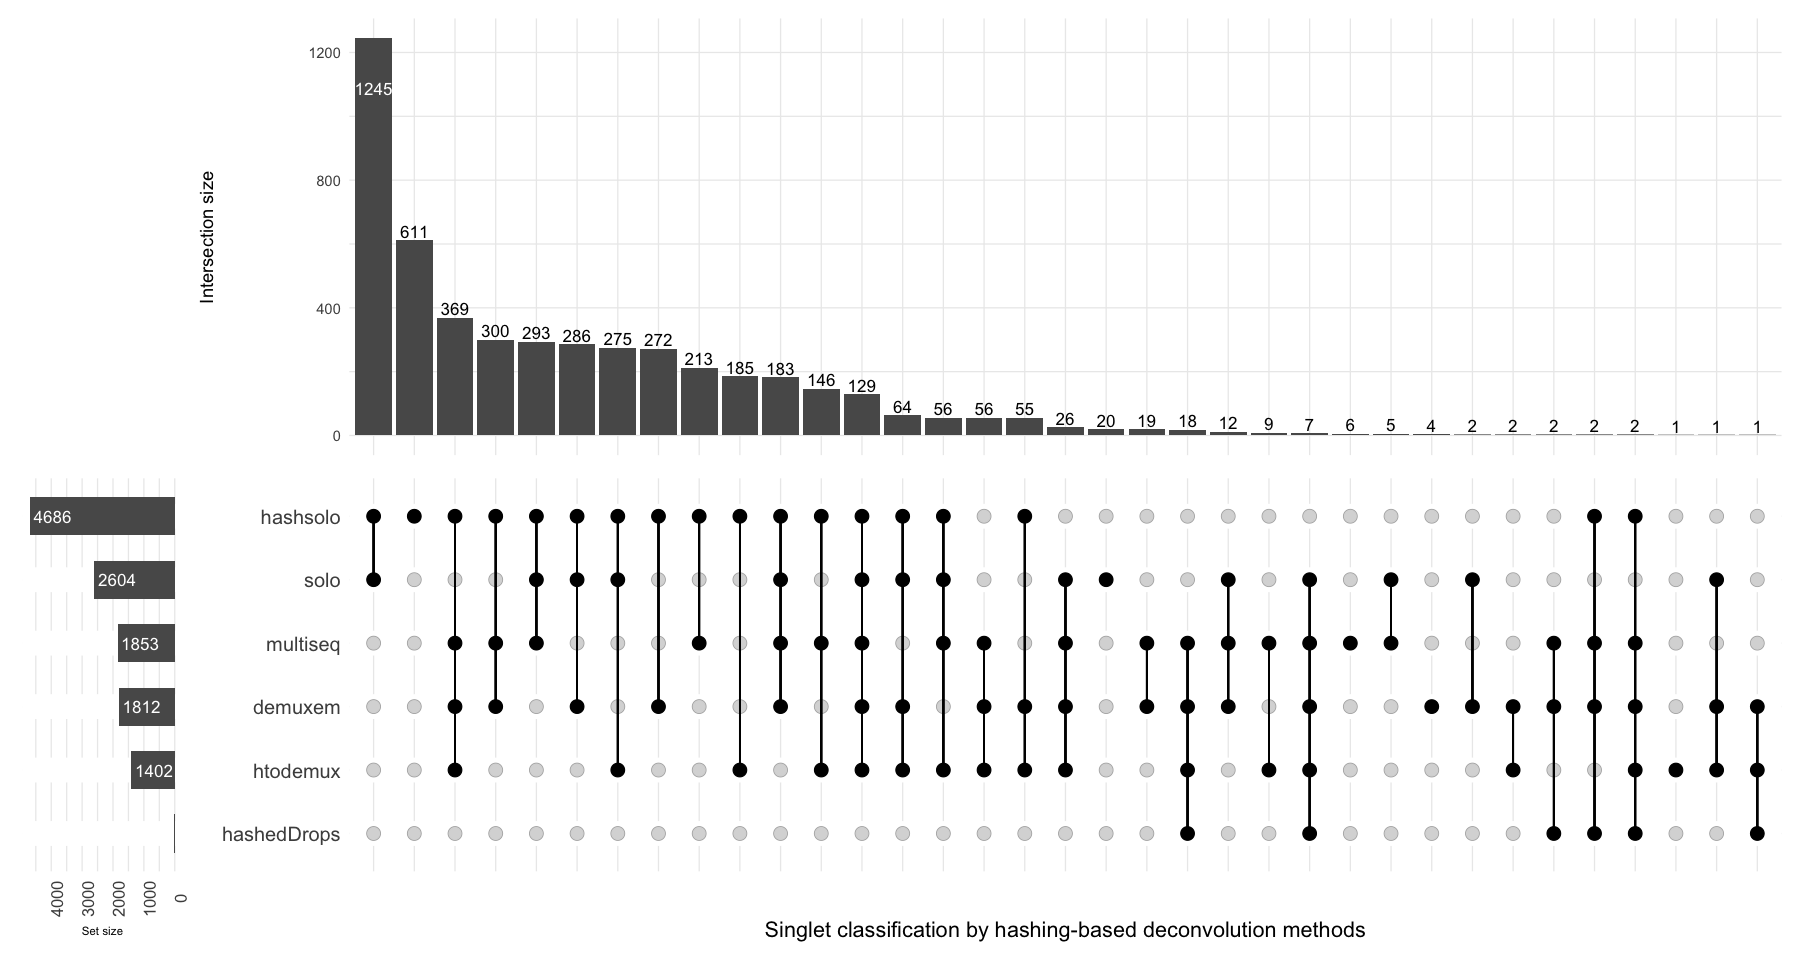

In [98]:
# Change plot size to 15 x 8
options(repr.plot.width=15, repr.plot.height=8)

# upset plot 
ComplexUpset::upset(hash_gx12_classi_new_singlet, colnames(hash_gx12_classi_new_singlet), width_ratio = 0.1, 
                    height_ratio = 0.9, stripes = 'white', min_degree=1,
                    name="Singlet classification by hashing-based deconvolution methods",
                    set_sizes=(upset_set_size() + geom_text(aes(label = ..count.., size=4), hjust = -0.1, 
                                                            stat = 'count', color = 'white', size = 3.6) +
                               theme(axis.text.x = element_text(angle = 90, size=10), text = element_text(size = 7))),
                    base_annotations=list('Intersection size'= intersection_size(text=list(size=3.6))),
                    themes=upset_modify_themes(list('intersections_matrix'=theme(axis.text.y=element_text(size=12),
                                                                                text=element_text(size=13)))))

# ggsave("S2-upset-hash-singlet-gx12.png", width= 15, height=5, dpi=300)

In [99]:
# Subset to doublets
hash_gx12_classi_new_doublet <- hash_gx12_classi_new[hash_gx12_classi_new$value=='doublet',]
hash_gx12_classi_new_doublet <- hash_gx12_classi_new_doublet[, -3]

# table in a wide format
hash_gx12_classi_new_doublet <- dcast(hash_gx12_classi_new_doublet, Barcode~variable)
hash_gx12_classi_new_doublet <- as.data.frame(lapply(hash_gx12_classi_new_doublet[, -1], as.numeric))

# turn into a binary matrix
hash_gx12_classi_new_doublet[!is.na(hash_gx12_classi_new_doublet)] <- 1
hash_gx12_classi_new_doublet[is.na(hash_gx12_classi_new_doublet)] <- 0
head(hash_gx12_classi_new_doublet)

Using 'variable' as value column. Use 'value.var' to override



,demuxem,hashsolo,htodemux,multiseq,solo
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,1,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,1,1,1,1
5,1,0,0,0,1
6,0,0,0,0,1


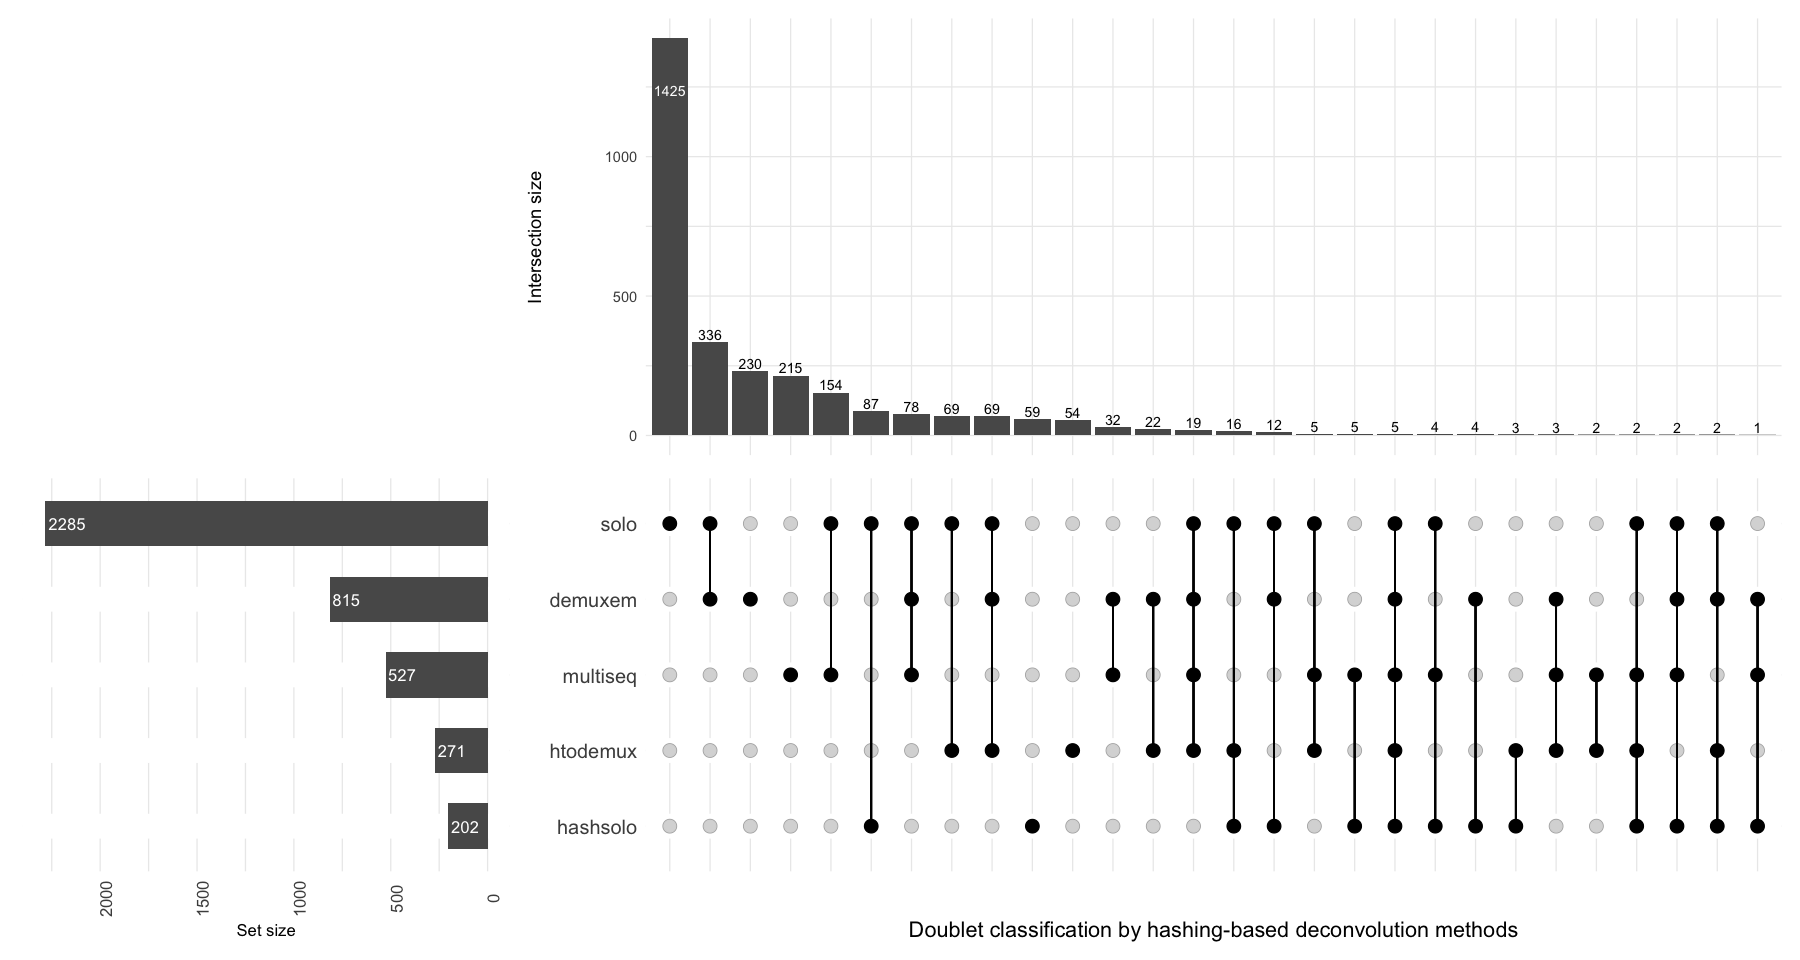

In [100]:
ComplexUpset::upset(hash_gx12_classi_new_doublet, colnames(hash_gx12_classi_new_doublet), width_ratio = 0.3, 
                    height_ratio = 0.9, stripes = 'white', min_degree=1, 
                    name="Doublet classification by hashing-based deconvolution methods",
                    set_sizes=(upset_set_size() + geom_text(aes(label = ..count.., size=3), hjust = -0.1, 
                                                            stat = 'count', color = 'white', size = 3.5) +
                               theme(axis.text.x = element_text(angle = 90, size=10), text = element_text(size = 10))),
                    base_annotations=list('Intersection size'= intersection_size(text=list(size=3))),
                    themes=upset_modify_themes(list('intersections_matrix'=theme(axis.text.y=element_text(size=12),
                                                                                text=element_text(size=13)))))
# ggsave("S3-upset-hash-doublet-gx12.png", width= 15, height=5, dpi=300)

### Define a function to convert the result to a binary matrix 

In [101]:
convert2binary <- function(assignment, identity){
    # table in a long format
    assignment_new <- melt(assignment, id.vars=1)
    assignment_new <- na.omit(assignment_new)
 
    # Subset to identity
    assignment_new <- assignment_new[assignment_new$value==identity,]
    assignment_new <- assignment_new [, -3]

    # table in a wide format
    assignment_new <- dcast(assignment_new, Barcode~variable)
    assignment_new <- as.data.frame(lapply(assignment_new [, -1], as.numeric))

    # turn into a binary matrix
    assignment_new[!is.na(assignment_new)] <- 1
    assignment_new[is.na(assignment_new)] <- 0
    
    return(assignment_new)
}

## Upset plot for hashtag identification of hashing deconvolution methods

In [102]:
# Load hashing deconvolution results
hash_gx12_assign <-fread("../data/pipeline_output/gx12/hash_assignment_all.csv")

# Remove the trial ID
colnames(hash_gx12_assign) <- gsub("_1", "", colnames(hash_gx12_assign))

# Subset by only those cells detected by RNA
hash_gx12_assign <- hash_gx12_assign[Barcode %in% white_list_gx12,]

# Remove TotalSeqA suffix
hash_gx12_assign$htodemux <- gsub("-TotalSeqA", "", hash_gx12_assign$htodemux)
hash_gx12_assign$multiseq <- gsub("-TotalSeqA", "", hash_gx12_assign$multiseq)
hash_gx12_assign$demuxem <- gsub("_TotalSeqA", "", hash_gx12_assign$demuxem)
hash_gx12_assign$hashsolo <- gsub("_TotalSeqA", "", hash_gx12_assign$hashsolo)


head(hash_gx12_assign)

Barcode,demuxem,hashsolo,htodemux,multiseq
<chr>,<chr>,<chr>,<chr>,<chr>
AAACCCAAGGTGTGAC-1,Hash454,Hash453,Hash453,Hash454
AAACCCAGTGAGAGGG-1,Hash453,Hash453,negative,doublet
AAACGAAAGAATCTAG-1,negative,Hash453,negative,negative
AAACGAACACATATGC-1,Hash456,Hash453,negative,negative
AAACGAACACGACTAT-1,Hash452,Hash453,Hash453,Hash452
AAACGAACATCAGCAT-1,negative,Hash453,Hash453,negative


Using 'variable' as value column. Use 'value.var' to override



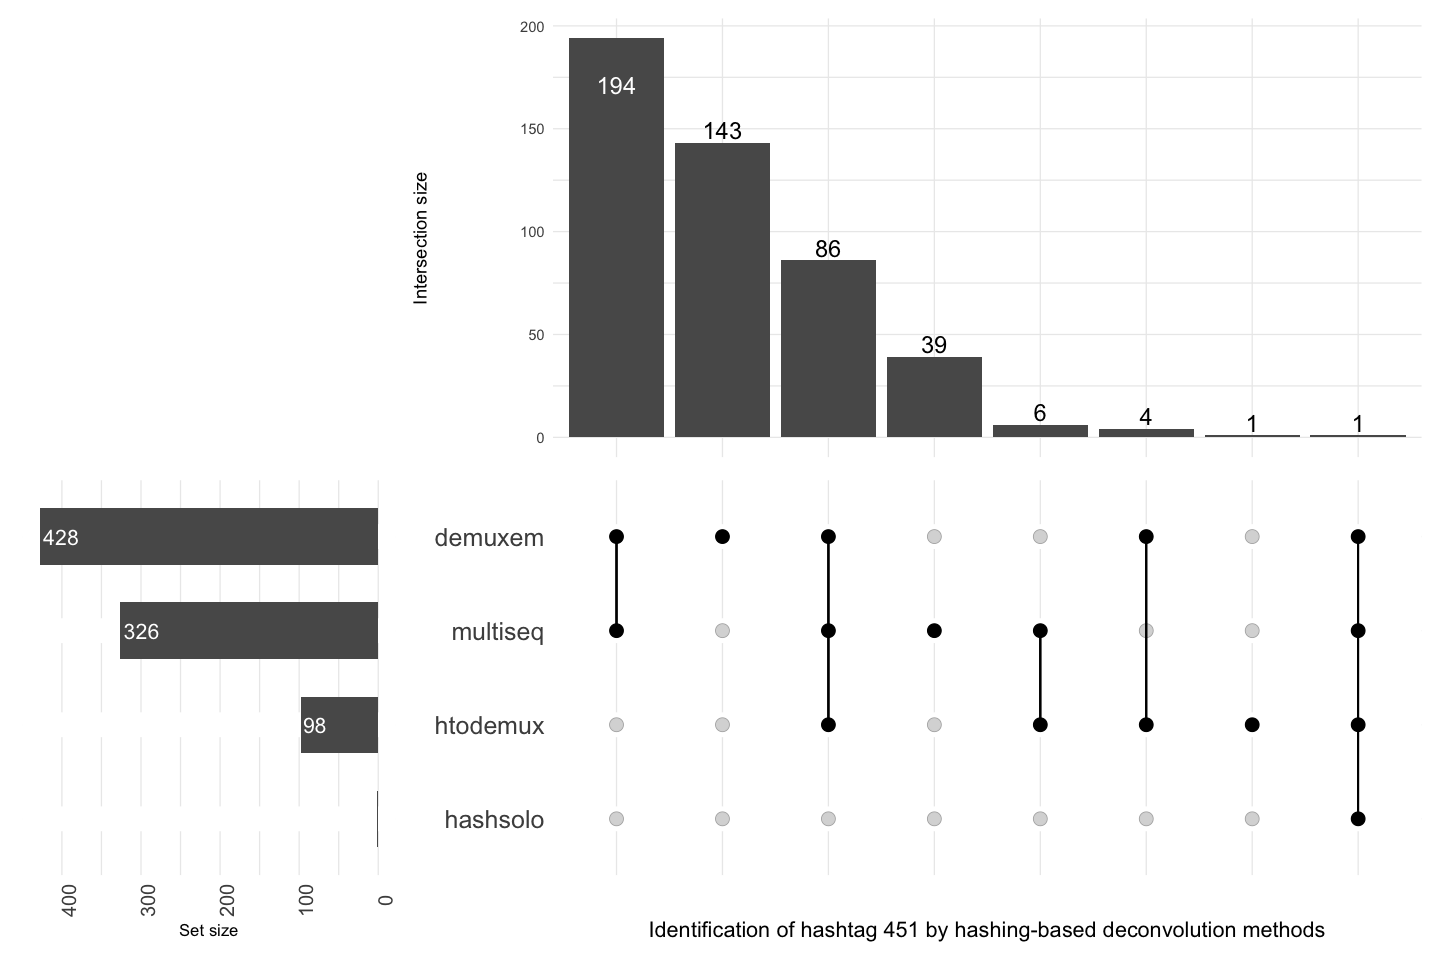

In [103]:
# convert to binary matrix
hash_ht451 <- convert2binary(hash_gx12_assign, 'Hash451')

# Change plot size to 12 x 8
options(repr.plot.width=12, repr.plot.height=8)

ComplexUpset::upset(hash_ht451, colnames(hash_ht451), width_ratio = 0.3, 
                    height_ratio = 0.9, stripes = 'white', min_degree=1, 
                    name="Identification of hashtag 451 by hashing-based deconvolution methods",
                    set_sizes=(upset_set_size() + geom_text(aes(label = ..count.., size=6), hjust = -0.1, 
                                                            stat = 'count', color = 'white', size = 4.5) +
                               theme(axis.text.x = element_text(angle = 90, size=12), text = element_text(size = 10))),
                    base_annotations=list('Intersection size'= intersection_size(text=list(size=5))),
                    themes=upset_modify_themes(list('intersections_matrix'=theme(axis.text.y=element_text(size=15),
                                                                                text=element_text(size=13)))))

# ggsave("S4-upset-hashing-hashtag451-gx12.png", width= 12, height=8, dpi=300)

Using 'variable' as value column. Use 'value.var' to override



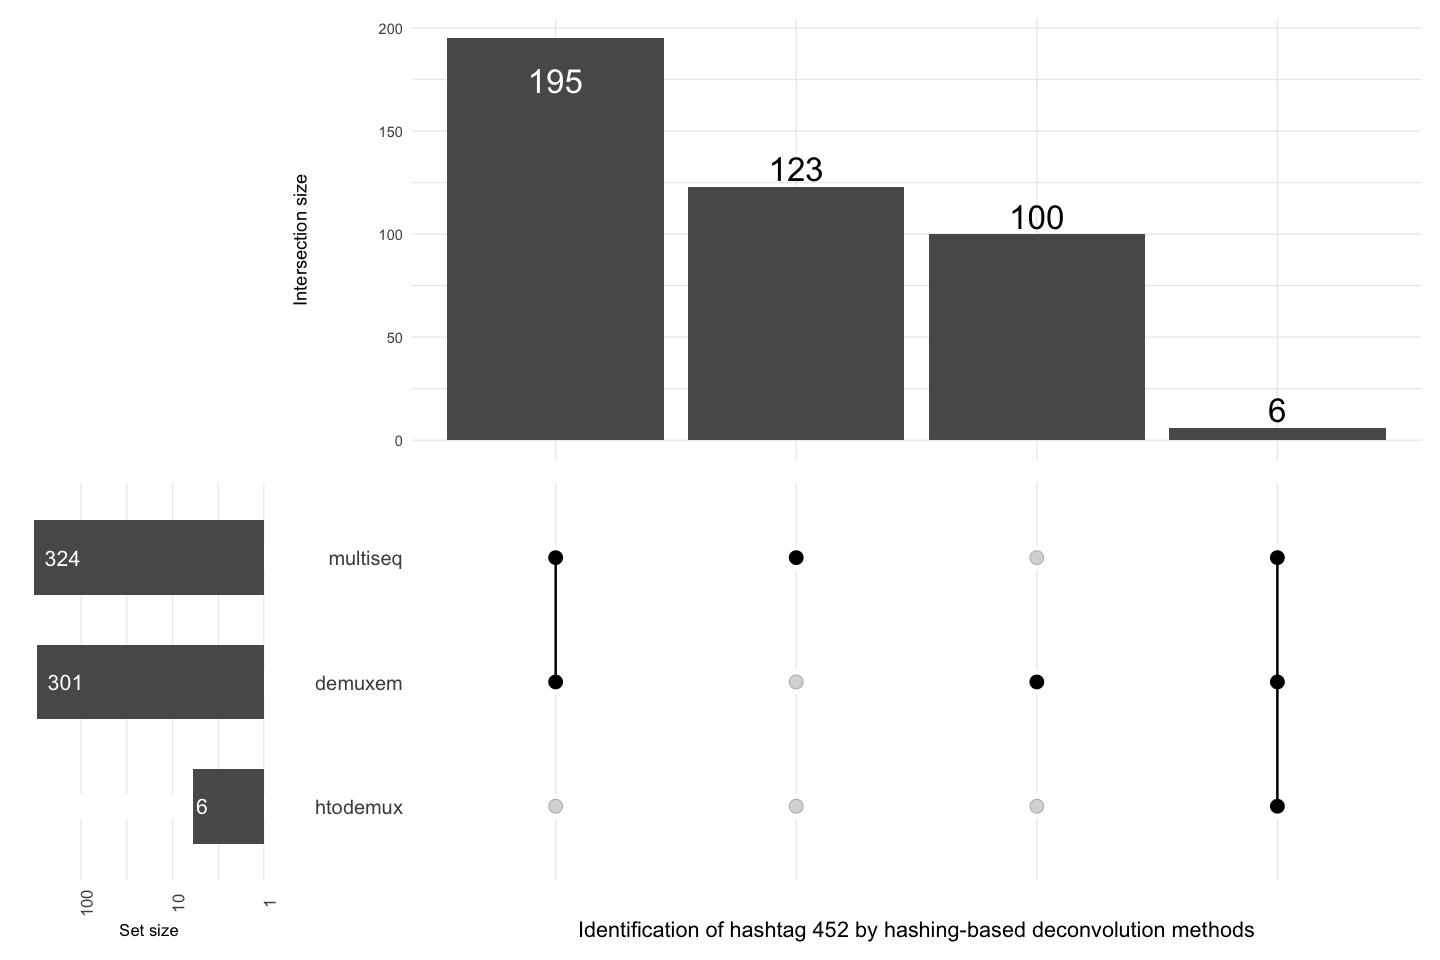

In [104]:
# convert to binary matrix
hash_ht452 <- convert2binary(hash_gx12_assign, 'Hash452')

ComplexUpset::upset(hash_ht452, colnames(hash_ht452), width_ratio = 0.2, 
                    height_ratio = 0.9, stripes = 'white', min_degree=1, 
                    name="Identification of hashtag 452 by hashing-based deconvolution methods",
                    set_sizes=(upset_set_size() + geom_text(aes(label = ..count.., size=6), hjust = -0.3, 
                                                            stat = 'count', color = 'white', size = 4.5) +
                               theme(axis.text.x = element_text(angle = 90, size=10), text = element_text(size = 10)) + 
                               scale_y_continuous(trans=reverse_log_trans())),
                    base_annotations=list('Intersection size'= intersection_size(text=list(size=7))),
                    themes=upset_modify_themes(list('intersections_matrix'=theme(axis.text.y=element_text(size=12),
                                                                                text=element_text(size=13)))))

# ggsave("S5-upset-hashing-hashtag452-gx12.png", width= 10, height=8, dpi=300)

Using 'variable' as value column. Use 'value.var' to override



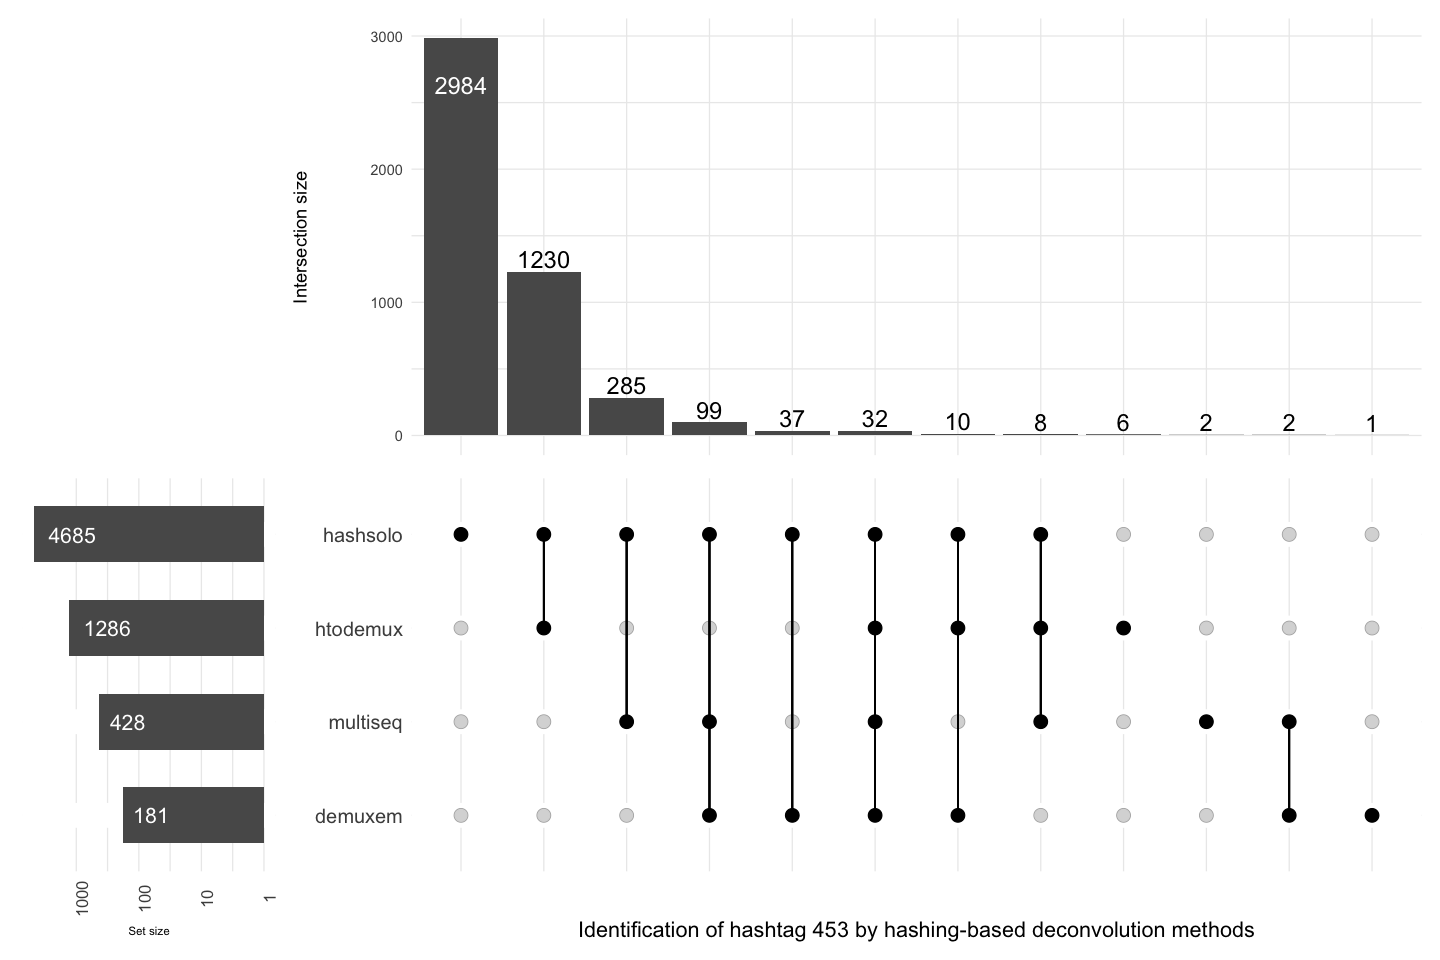

In [105]:
# convert to binary matrix
hash_ht453 <- convert2binary(hash_gx12_assign, 'Hash453')

ComplexUpset::upset(hash_ht453, colnames(hash_ht453), width_ratio = 0.2, 
                    height_ratio = 0.9, stripes = 'white', min_degree=1, 
                    name="Identification of hashtag 453 by hashing-based deconvolution methods",
                    set_sizes=(upset_set_size() + geom_text(aes(label = ..count.., size=6), hjust = -0.3, 
                                                            stat = 'count', color = 'white', size = 4.5) +
                               theme(axis.text.x = element_text(angle = 90, size=10), text = element_text(size = 7)) + 
                               scale_y_continuous(trans=reverse_log_trans())),
                    base_annotations=list('Intersection size'= intersection_size(text=list(size=5))),
                    themes=upset_modify_themes(list('intersections_matrix'=theme(axis.text.y=element_text(size=12),
                                                                                text=element_text(size=13)))))

# ggsave("S6-upset-hashing-hashtag453-gx12.png", width= 10, height=8, dpi=300)

Using 'variable' as value column. Use 'value.var' to override



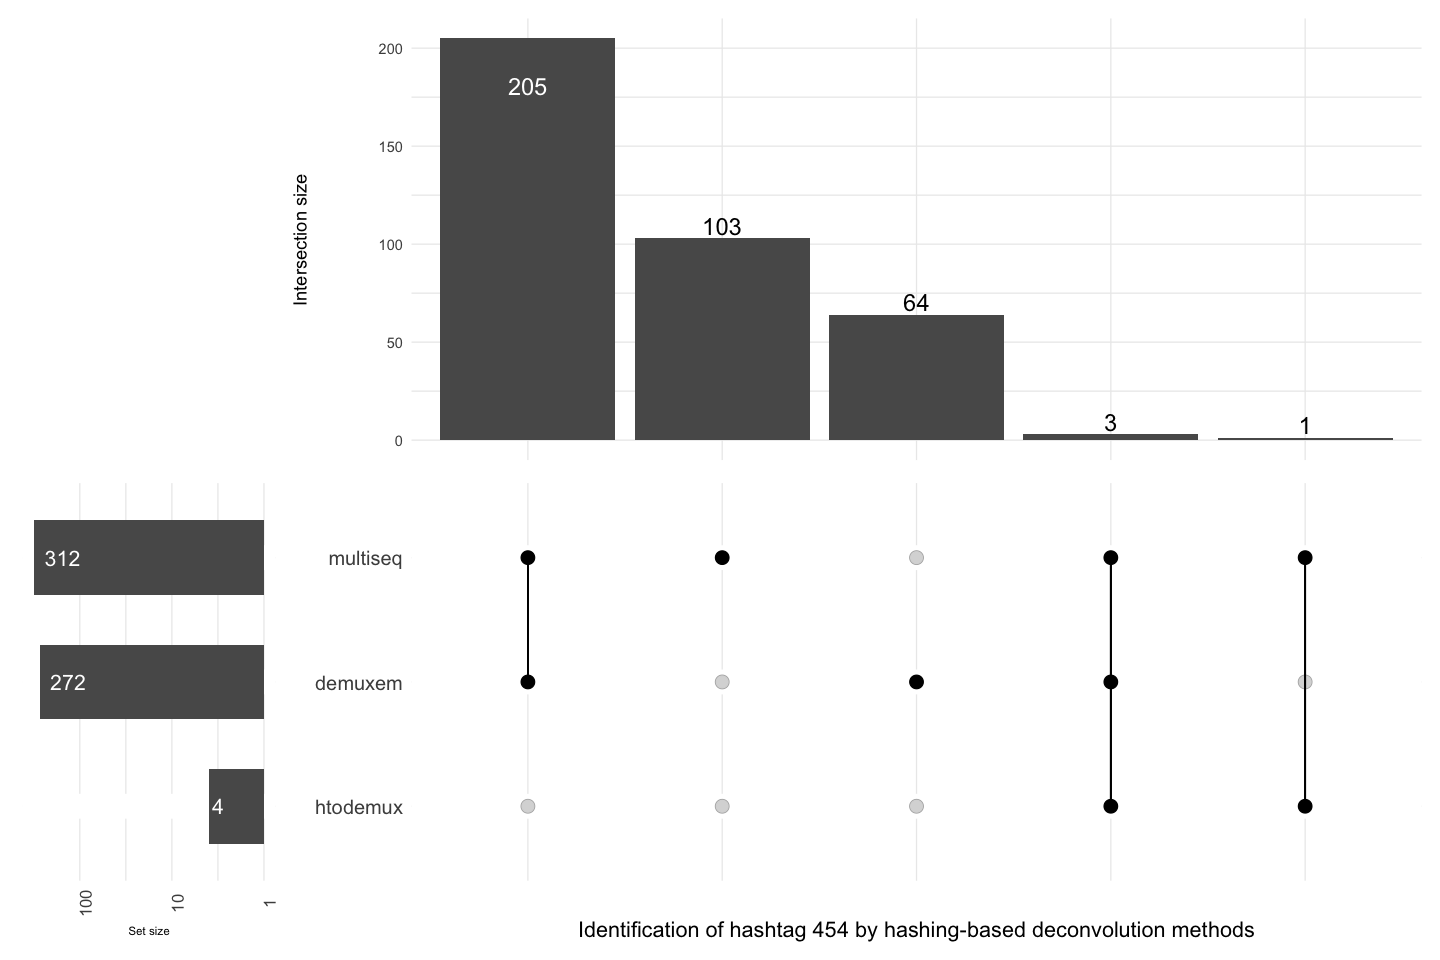

In [106]:
# convert to binary matrix
hash_ht454 <- convert2binary(hash_gx12_assign, 'Hash454')

ComplexUpset::upset(hash_ht454, colnames(hash_ht454), width_ratio = 0.2, 
                    height_ratio = 0.9, stripes = 'white', min_degree=1, 
                    name="Identification of hashtag 454 by hashing-based deconvolution methods",
                    set_sizes=(upset_set_size() + geom_text(aes(label = ..count.., size=6), hjust = -0.3, 
                                                            stat = 'count', color = 'white', size = 4.5) +
                               theme(axis.text.x = element_text(angle = 90, size=10), text = element_text(size = 7)) + 
                               scale_y_continuous(trans=reverse_log_trans())),
                    base_annotations=list('Intersection size'= intersection_size(text=list(size=5))),
                    themes=upset_modify_themes(list('intersections_matrix'=theme(axis.text.y=element_text(size=12),
                                                                                text=element_text(size=13)))))

# ggsave("S7-upset-hashing-hashtag454-gx12.png", width= 12, height=8, dpi=300)

Using 'variable' as value column. Use 'value.var' to override



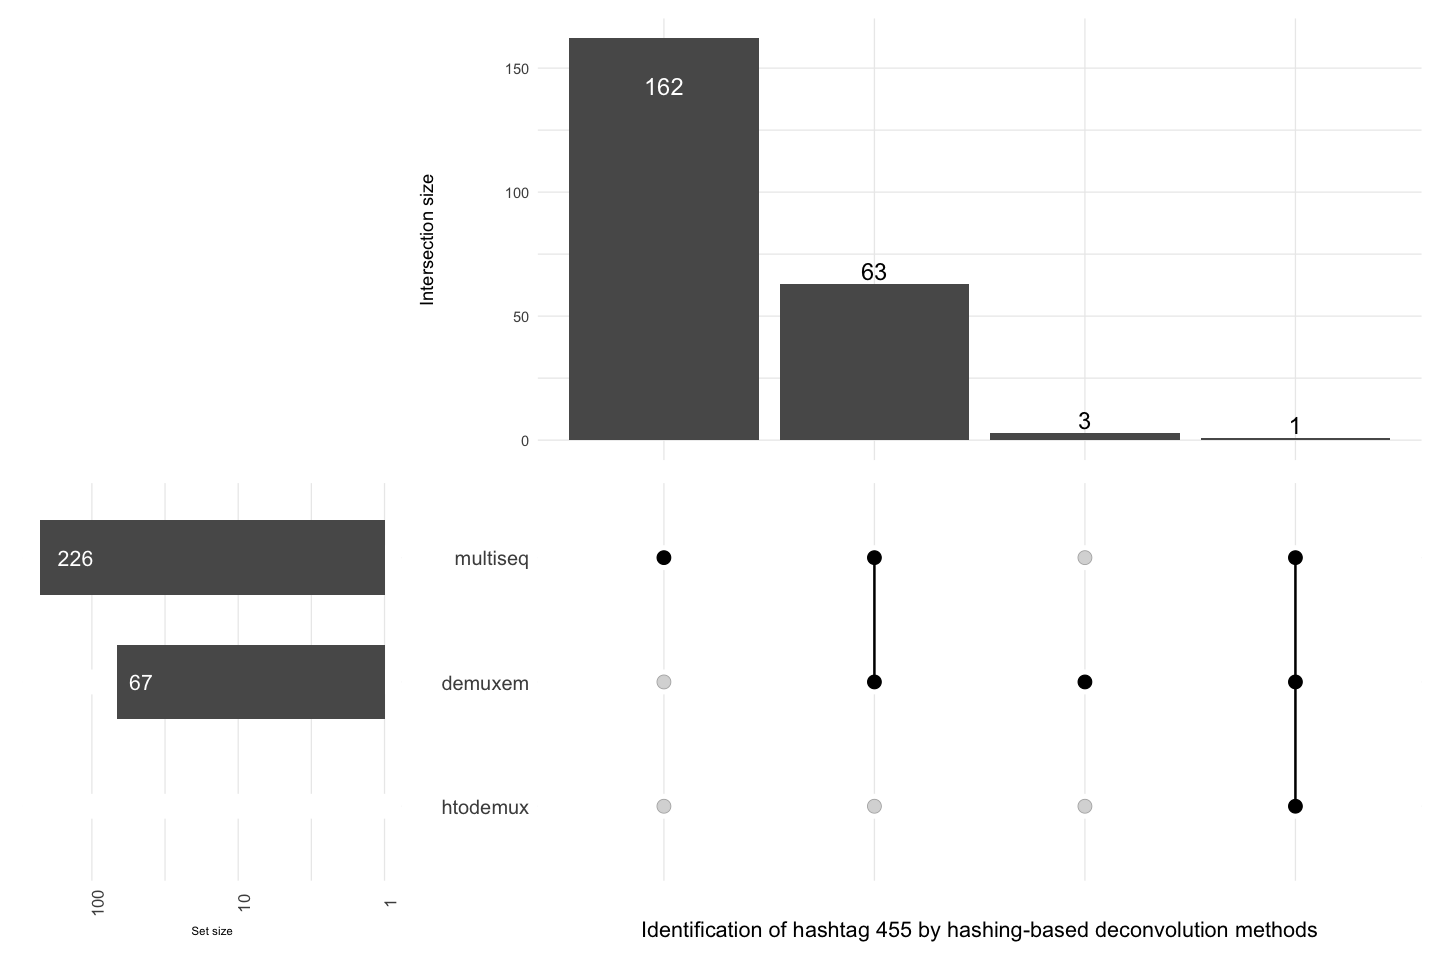

In [107]:
# convert to binary matrix
hash_ht455 <- convert2binary(hash_gx12_assign, 'Hash455')

ComplexUpset::upset(hash_ht455, colnames(hash_ht455), width_ratio = 0.3, 
                    height_ratio = 0.9, stripes = 'white', min_degree=1, 
                    name="Identification of hashtag 455 by hashing-based deconvolution methods",
                    set_sizes=(upset_set_size() + geom_text(aes(label = ..count.., size=6), hjust = -0.5, 
                                                            stat = 'count', color = 'white', size = 4.5) +
                               theme(axis.text.x = element_text(angle = 90, size=10), text = element_text(size = 7)) + 
                               scale_y_continuous(trans=reverse_log_trans())),
                    base_annotations=list('Intersection size'= intersection_size(text=list(size=5))),
                    themes=upset_modify_themes(list('intersections_matrix'=theme(axis.text.y=element_text(size=12),
                                                                                text=element_text(size=13)))))
# ggsave("S8-upset-hashing-hashtag455-gx12.png", width= 10, height=8, dpi=300)

Using 'variable' as value column. Use 'value.var' to override



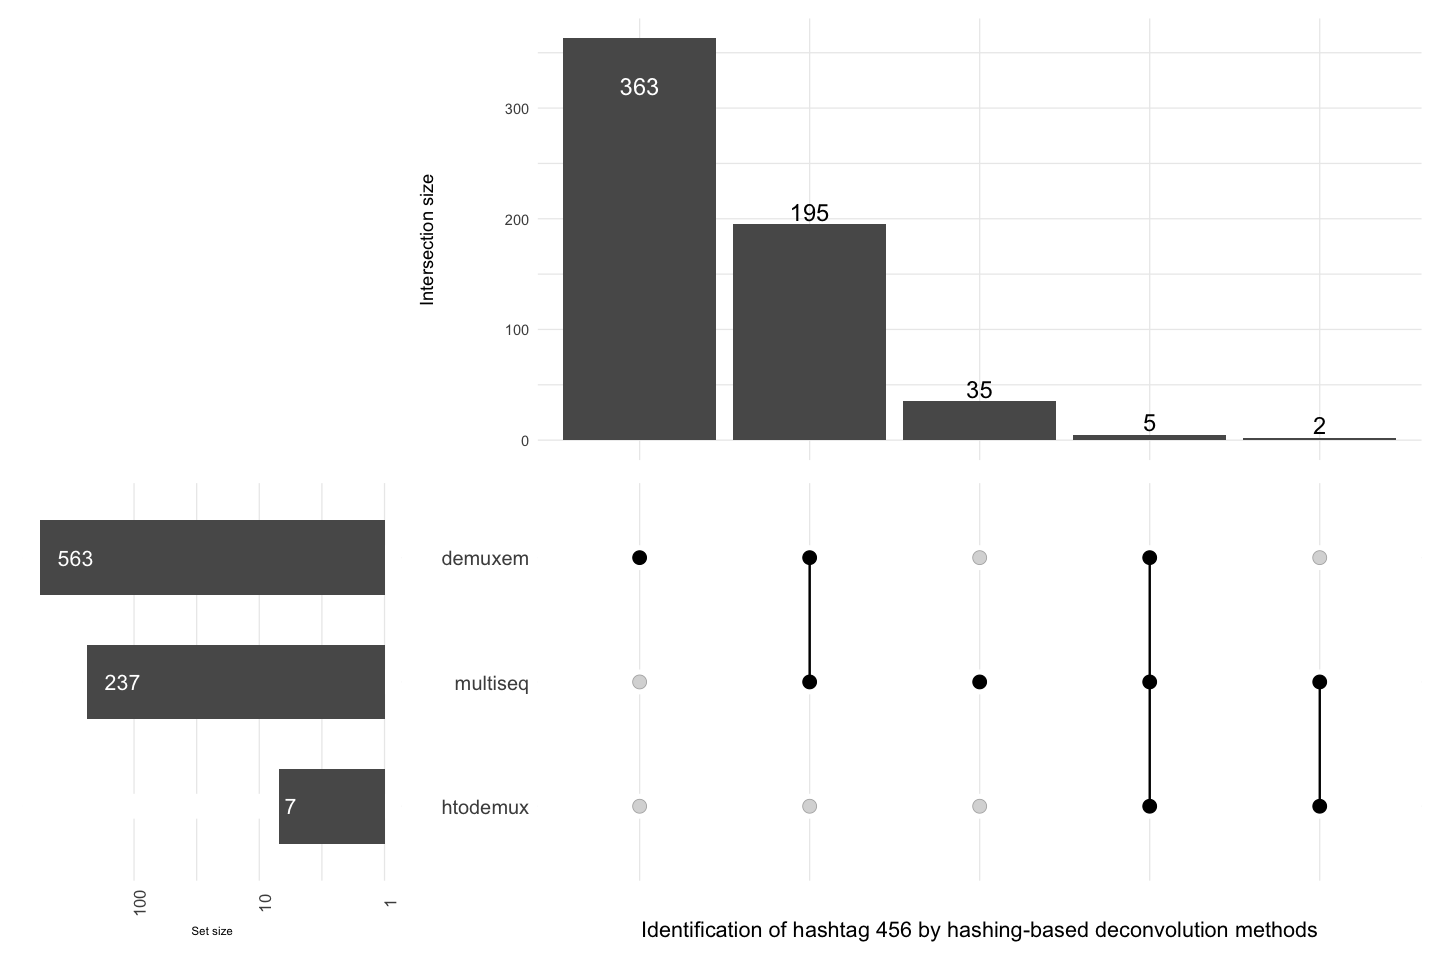

In [108]:
# convert to binary matrix
hash_ht456 <- convert2binary(hash_gx12_assign, 'Hash456')

ComplexUpset::upset(hash_ht456, colnames(hash_ht456), width_ratio = 0.3, 
                    height_ratio = 0.9, stripes = 'white', min_degree=1, 
                    name="Identification of hashtag 456 by hashing-based deconvolution methods",
                    set_sizes=(upset_set_size() + geom_text(aes(label = ..count.., size=6), hjust = -0.5, 
                                                            stat = 'count', color = 'white', size = 4.5) +
                               theme(axis.text.x = element_text(angle = 90, size=10), text = element_text(size = 7)) + 
                               scale_y_continuous(trans=reverse_log_trans())),
                    base_annotations=list('Intersection size'= intersection_size(text=list(size=5))),
                    themes=upset_modify_themes(list('intersections_matrix'=theme(axis.text.y=element_text(size=12),
                                                                                text=element_text(size=13)))))

# ggsave("S9-upset-hashing-hashtag456-gx12.png", width= 10, height=8, dpi=300)

## Visualisation of imbalanced hashing deconvolution results

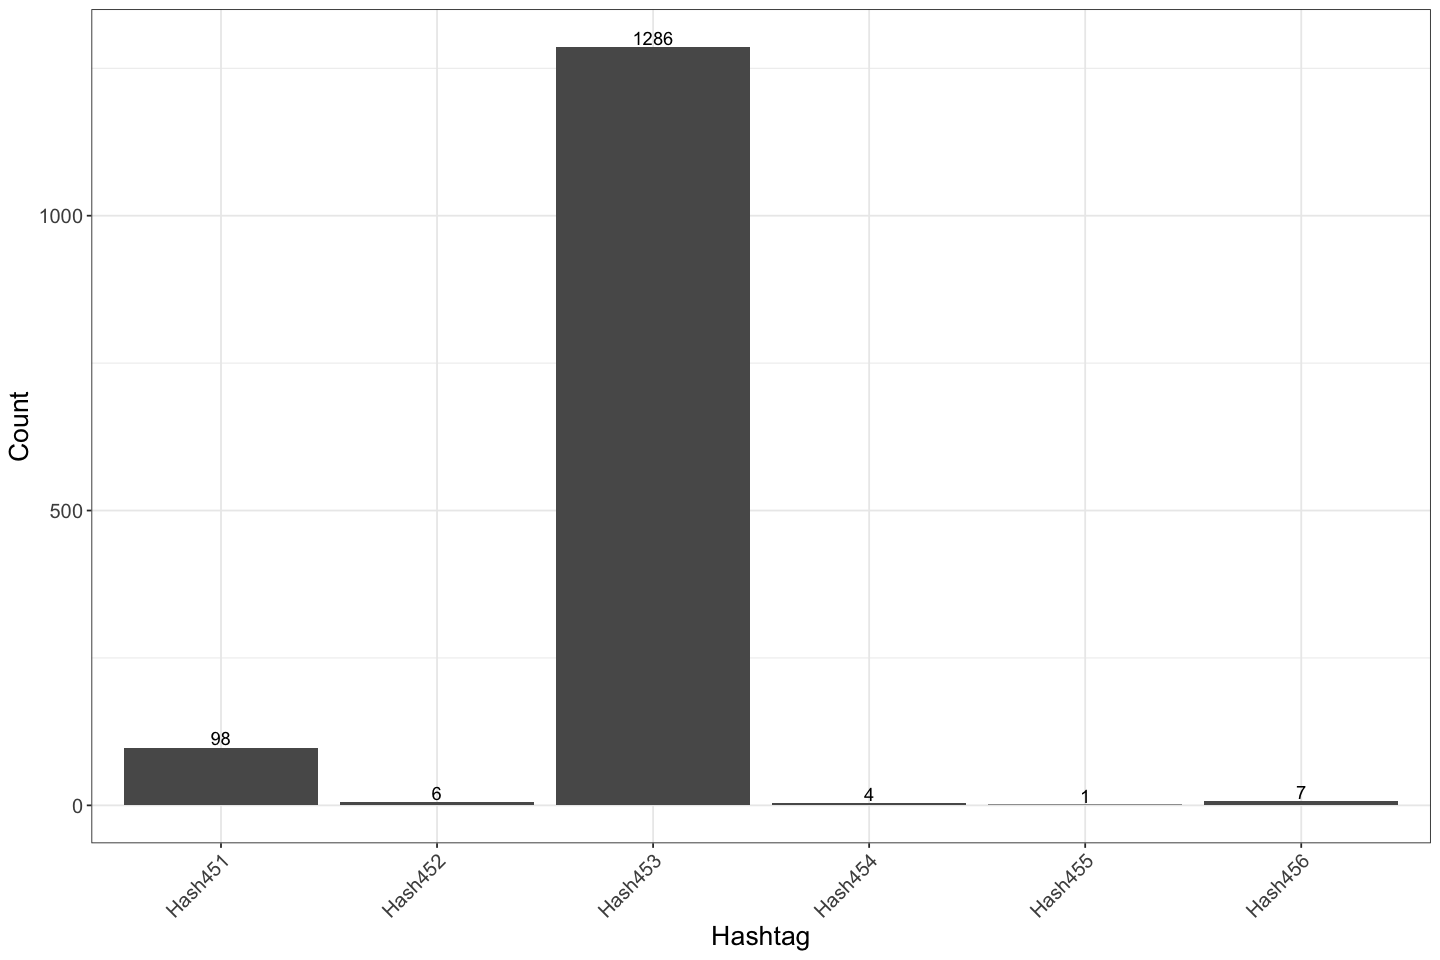

In [109]:
# Subset to htodemux result
htodemux_gx12_assign <- hash_gx12_assign[, c(1,4)]
htodemux_gx12_assign <- na.omit(htodemux_gx12_assign)

# Subset to singlets
htodemux_gx12_assign <- htodemux_gx12_assign[!htodemux_gx12_assign$htodemux %in% c('negative', 'doublet'),]

# Barplot
ggplot(htodemux_gx12_assign, aes(htodemux_gx12_assign$htodemux)) + geom_bar() + 
    geom_text(stat='count', aes(label=..count..), vjust=-0.2) + theme_bw() + ylab("Count") + 
    theme(axis.text.x = element_text(angle = 45, hjust=1, size=12), axis.title.y = element_text(size=16), 
         axis.text.y = element_text(size=12), axis.title.x = element_text(size=16)) + xlab("Hashtag") 

## Upset plot for droplet classification of genetic deconvolution methods

In [110]:
# Load genetic demultiplexing results
gene_gx12_classi <-fread("../data/pipeline_output/gx12/genetic_classification_all.csv")

# Remove the trial ID
colnames(gene_gx12_classi) <- gsub("_1", "", colnames(gene_gx12_classi))

In [111]:
genetic_gx12_classi_new_singlet <- convert2binary(gene_gx12_classi, 'singlet')
genetic_gx12_classi_new_doublet <- convert2binary(gene_gx12_classi, 'doublet')

Using 'variable' as value column. Use 'value.var' to override

Using 'variable' as value column. Use 'value.var' to override



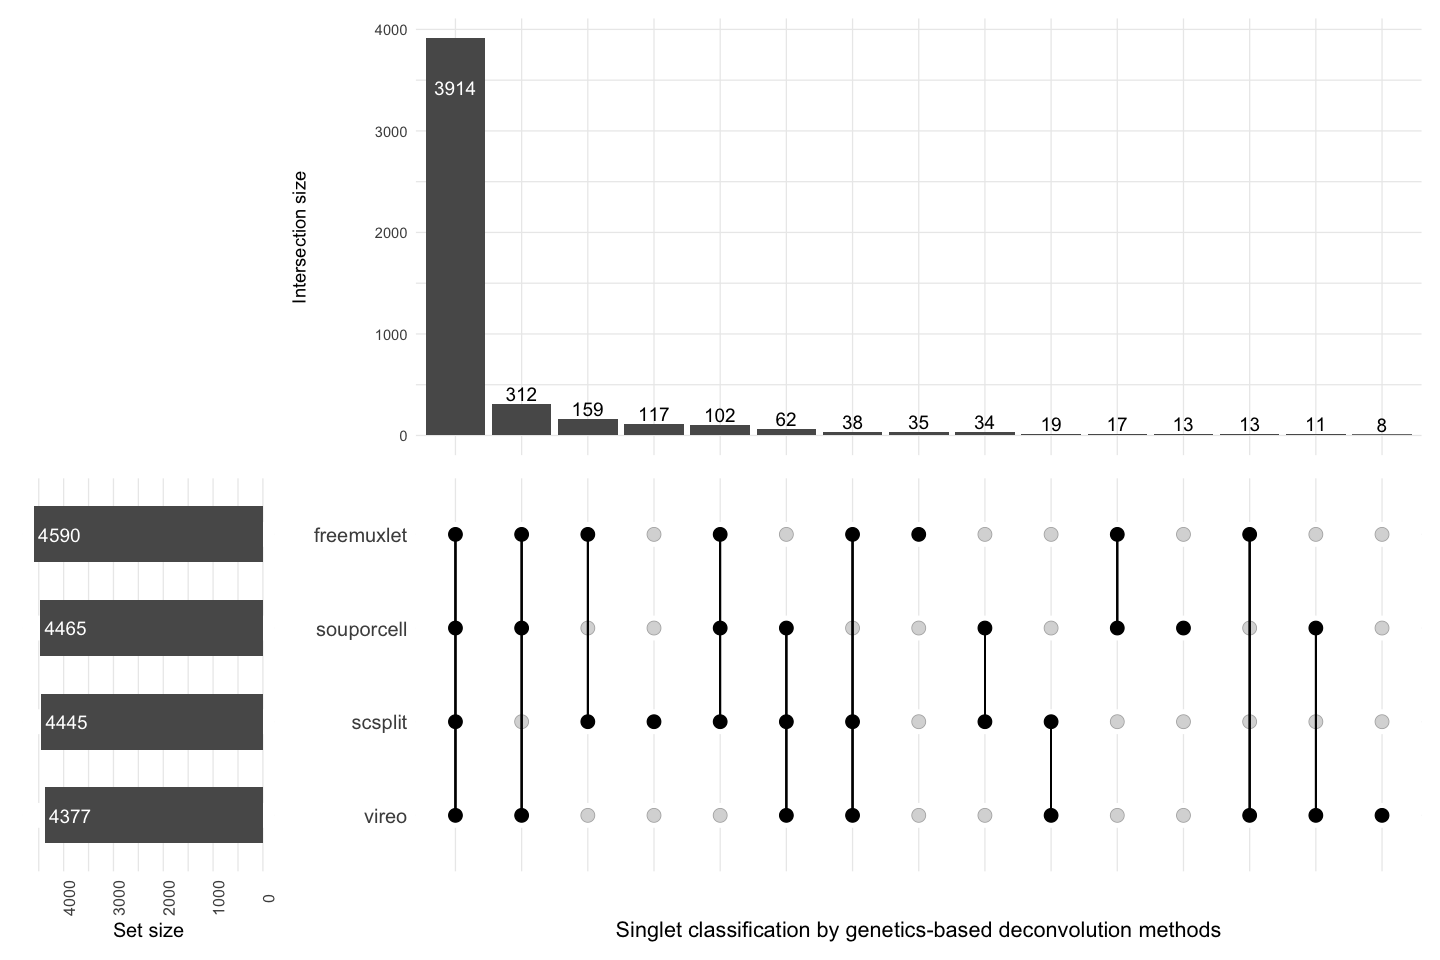

In [112]:
# Change plot size to 12 x 8
options(repr.plot.width=12, repr.plot.height=8)

ComplexUpset::upset(genetic_gx12_classi_new_singlet, colnames(genetic_gx12_classi_new_singlet), width_ratio = 0.2, 
                    height_ratio = 0.9, stripes = 'white', min_degree=1, 
                    name="Singlet classification by genetics-based deconvolution methods",
                    set_sizes=(upset_set_size() + geom_text(aes(label = ..count.., size=3), hjust = -0.1, 
                                                            stat = 'count', color = 'white', size = 4) +
                               theme(axis.text.x = element_text(angle = 90), text = element_text(size = 12))),
                    base_annotations=list('Intersection size'= intersection_size(text=list(size=4))),
                    themes=upset_modify_themes(list('intersections_matrix'=theme(axis.text.y=element_text(size=12),
                                                                                text=element_text(size=13)))))

# ggsave("S10-upset-genetic-singlet-gx12.png", width= 12, height=8, dpi=300)

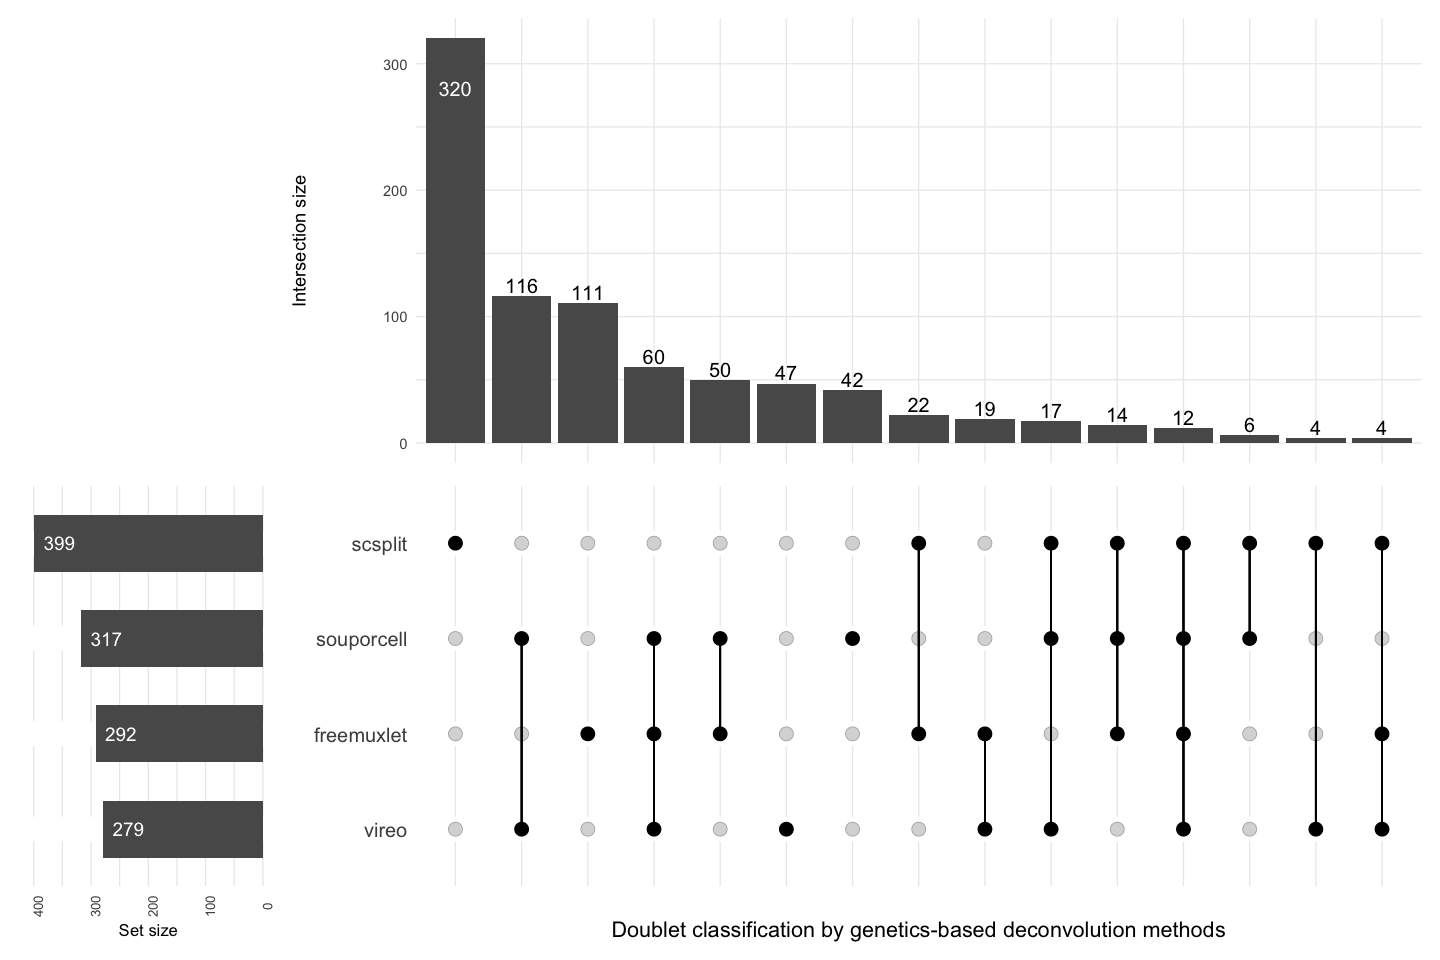

In [113]:
ComplexUpset::upset(genetic_gx12_classi_new_doublet, colnames(genetic_gx12_classi_new_doublet), width_ratio = 0.2, 
                    height_ratio = 0.9, stripes = 'white', min_degree=1, 
                    name="Doublet classification by genetics-based deconvolution methods",
                    set_sizes=(upset_set_size() + geom_text(aes(label = ..count.., size=3), hjust = -0.3, 
                                                            stat = 'count', color = 'white', size = 4) +
                               theme(axis.text.x = element_text(angle = 90), text = element_text(size = 10))),
                    base_annotations=list('Intersection size'= intersection_size(text=list(size=4.2))),
                    themes=upset_modify_themes(list('intersections_matrix'=theme(axis.text.y=element_text(size=12),
                                                                                text=element_text(size=13)))))

# ggsave("S11-upset-genetic-doublet-gx12.png", width= 12, height=8, dpi=300)

In [114]:
# Load genetic demultiplexing results
gene_gx12_assign <-fread("../data/pipeline_output/gx12/genetic_assignment_all.csv")

# Remove the trial ID
colnames(gene_gx12_assign) <- gsub("_1", "", colnames(gene_gx12_assign))

# Remove the donor prefix in vireo column
gene_gx12_assign$vireo <- gsub("donor", "", gene_gx12_assign$vireo)

## Visualisation of concordance among genetic deconvolution methods through confusion matrix

In [115]:
# Create an empyt matrix
confusion_matrix_f_so = as.data.frame(matrix(ncol = 6, nrow = 6))
rownames(confusion_matrix_f_so) = 0:5
colnames(confusion_matrix_f_so) = 0:5

# Fill the matrix
for (i in c(0:5)){
  for (j in c(0:5)){
    row = nrow(gene_gx12_assign[gene_gx12_assign$freemuxlet == i & gene_gx12_assign$souporcell == j,])
    confusion_matrix_f_so[i+1,j+1] = row
  }
}

confusion_matrix_f_so

,0,1,2,3,4,5
,<int>,<int>,<int>,<int>,<int>,<int>
0,0,646,1,0,0,0
1,756,0,0,1,0,0
2,1,0,697,0,0,1
3,0,1,0,223,1,0
4,0,0,0,0,0,795
5,0,0,0,1,1220,1


confusion_matrix_f_so = confusion_matrix_f_so %>% mutate(best_match=(max.col(confusion_matrix_f_so)-1))
confusion_matrix_f_so$pair = paste0(0:(nrow(confusion_matrix_f_so)-1),"/",confusion_matrix_f_so$best_match)
confusion_matrix_f_so

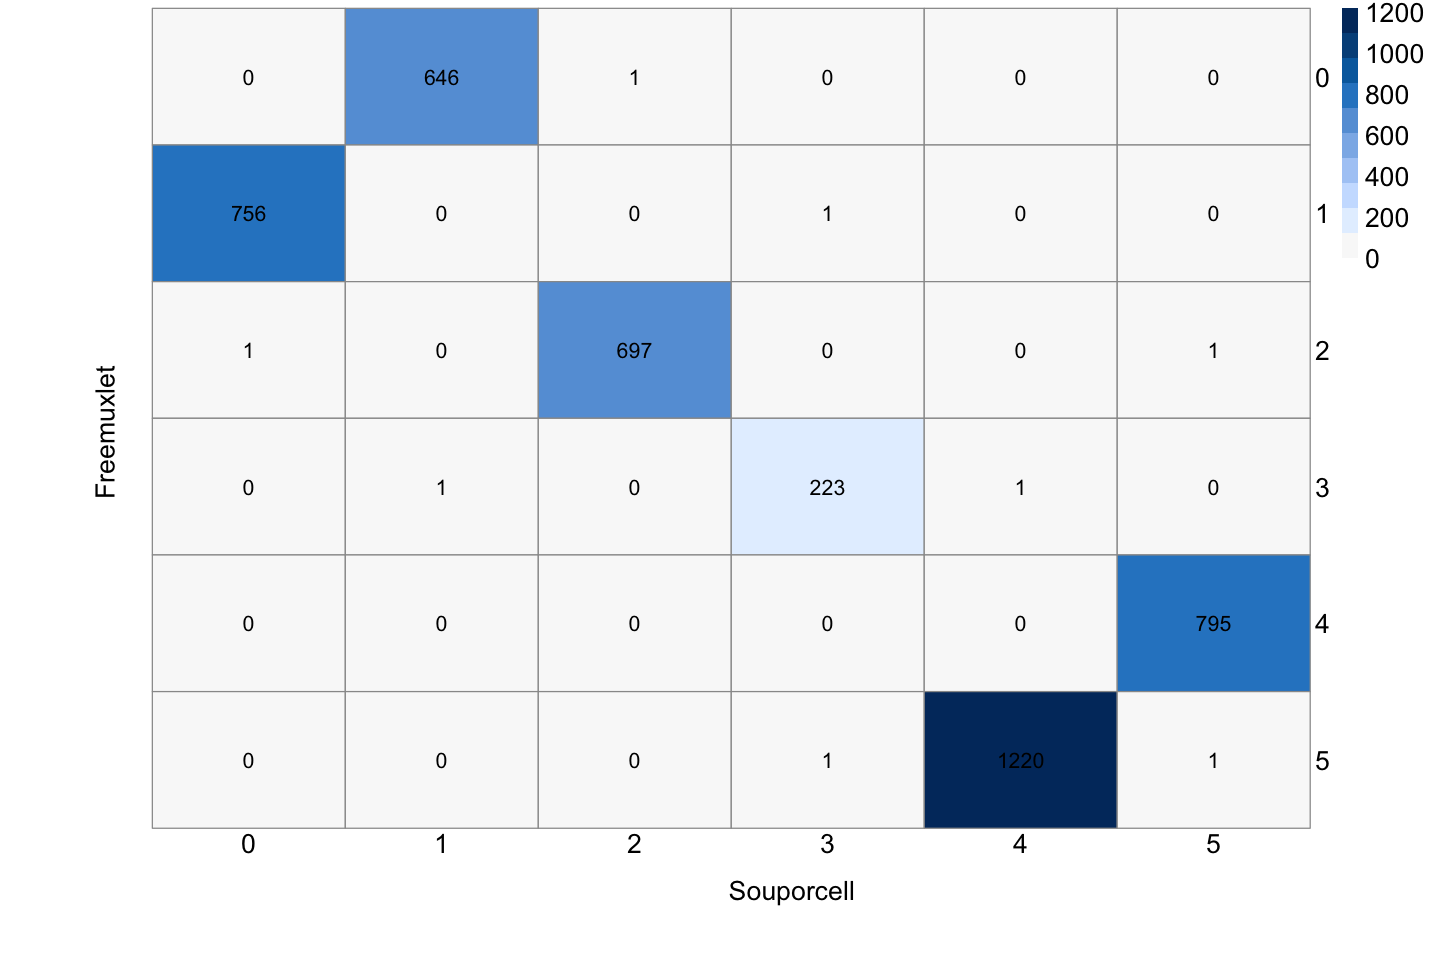

In [116]:
# png("S12-heatmap-so-fr-gx12.png", res=300, width=11, height=11, units="in")

setHook("grid.newpage", function() 
    pushViewport(viewport(x=1,y=1,width=0.9, height=0.9, name="vp", just=c("right","top"))), action="prepend")

pheatmap(confusion_matrix_f_so, treeheight_row=F, treeheight_col=F, display_numbers=T, angle_col="0",
         number_color = "black", fontsize = 16, cluster_rows = F, cluster_cols = F, number_format = "%.f",
         color = hcl.colors(10, "Blues 3", rev= T))

setHook("grid.newpage", NULL, "replace")
grid.text("Souporcell", y=-0.03, gp=gpar(fontsize=16))
grid.text("Freemuxlet", x=-0.03, rot=90, gp=gpar(fontsize=16))

# dev.copy()
# dev.off()

,0,1,2,3,4,5
,<int>,<int>,<int>,<int>,<int>,<int>
0,747,0,0,0,0,0
1,0,0,0,0,1194,0
2,0,0,0,1,0,795
3,0,631,1,0,0,1
4,0,0,0,227,0,0
5,0,0,701,0,0,1


quartz_off_screen 
                3

pdf 
  2

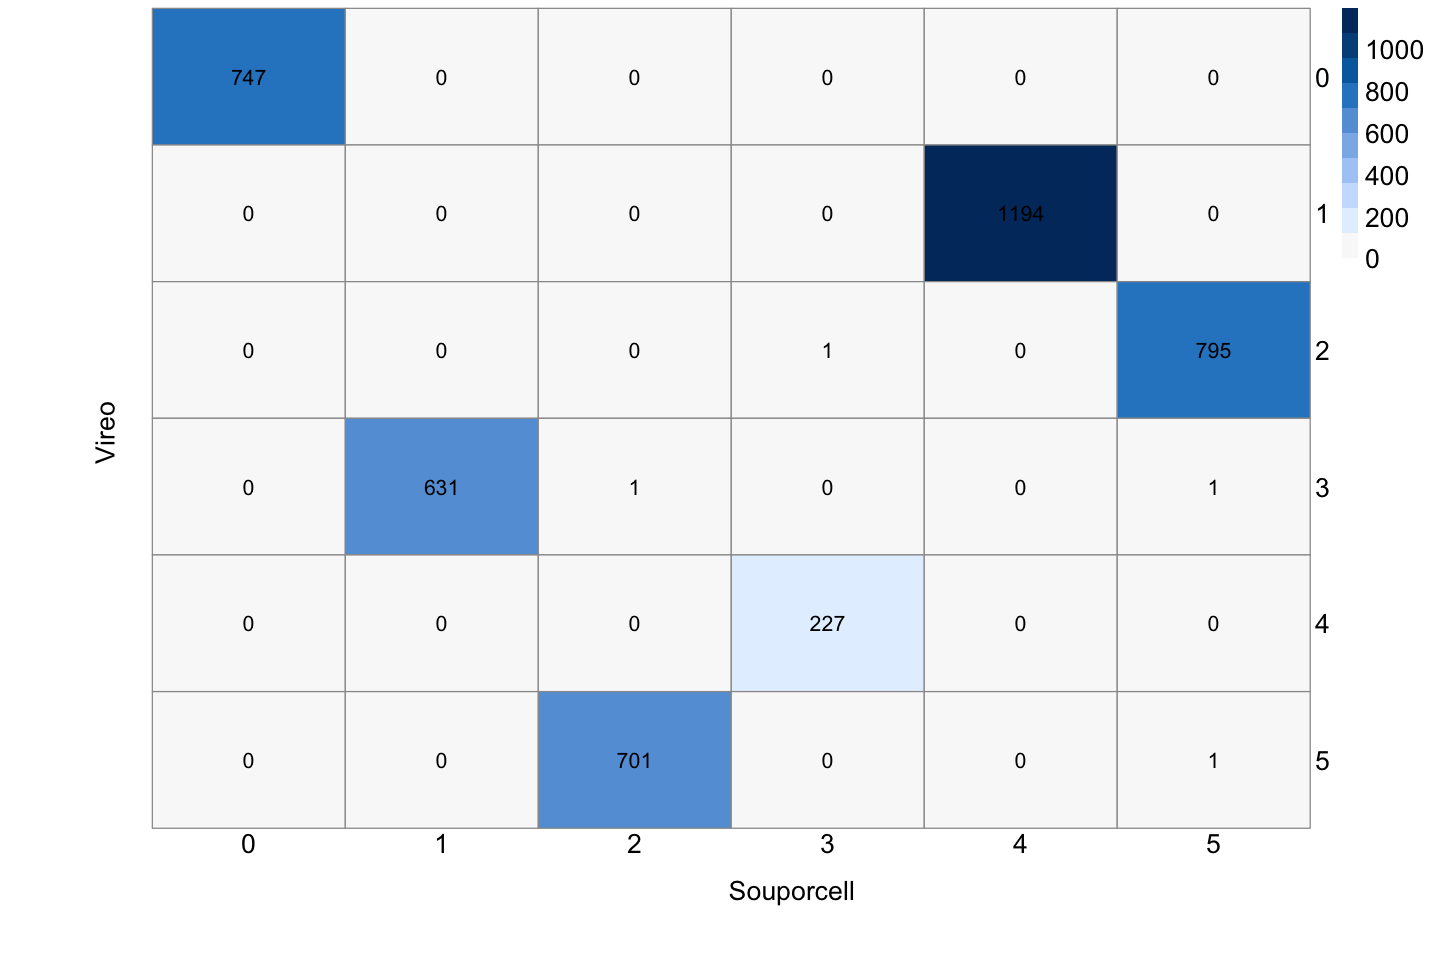

In [117]:
# Create an empyt matrix
confusion_matrix_v_so = as.data.frame(matrix(ncol = 6, nrow = 6))
rownames(confusion_matrix_v_so) = 0:5
colnames(confusion_matrix_v_so) = 0:5

# Fill the matrix
for (i in c(0:5)){
  for (j in c(0:5)){
    row = nrow(gene_gx12_assign[gene_gx12_assign$vireo == i & gene_gx12_assign$souporcell == j,])
    confusion_matrix_v_so[i+1,j+1] = row
  }
}

confusion_matrix_v_so

png("S13-heatmap-so-v-gx12.png", res=300, width=11, height=11, units="in")
# Add axis title
setHook("grid.newpage", function() 
    pushViewport(viewport(x=1,y=1,width=0.9, height=0.9, name="vp", just=c("right","top"))), action="prepend")

pheatmap(confusion_matrix_v_so, treeheight_row=F, treeheight_col=F, display_numbers=T, angle_col="0",
         number_color = "black", fontsize = 16, cluster_rows = F, cluster_cols = F, number_format = "%.f",
         color = hcl.colors(10, "Blues 3", rev= T))

setHook("grid.newpage", NULL, "replace")
grid.text("Souporcell", y=-0.03, gp=gpar(fontsize=16))
grid.text("Vireo", x=-0.03, rot=90, gp=gpar(fontsize=16))
        
dev.copy()
dev.off()

,0,1,2,3,4,5
,<int>,<int>,<int>,<int>,<int>,<int>
0,1,749,0,0,0,0
1,0,0,0,0,0,1196
2,1,0,0,0,780,0
3,630,0,1,0,0,1
4,0,0,1,229,0,0
5,0,0,688,0,0,0


quartz_off_screen 
                3

pdf 
  2

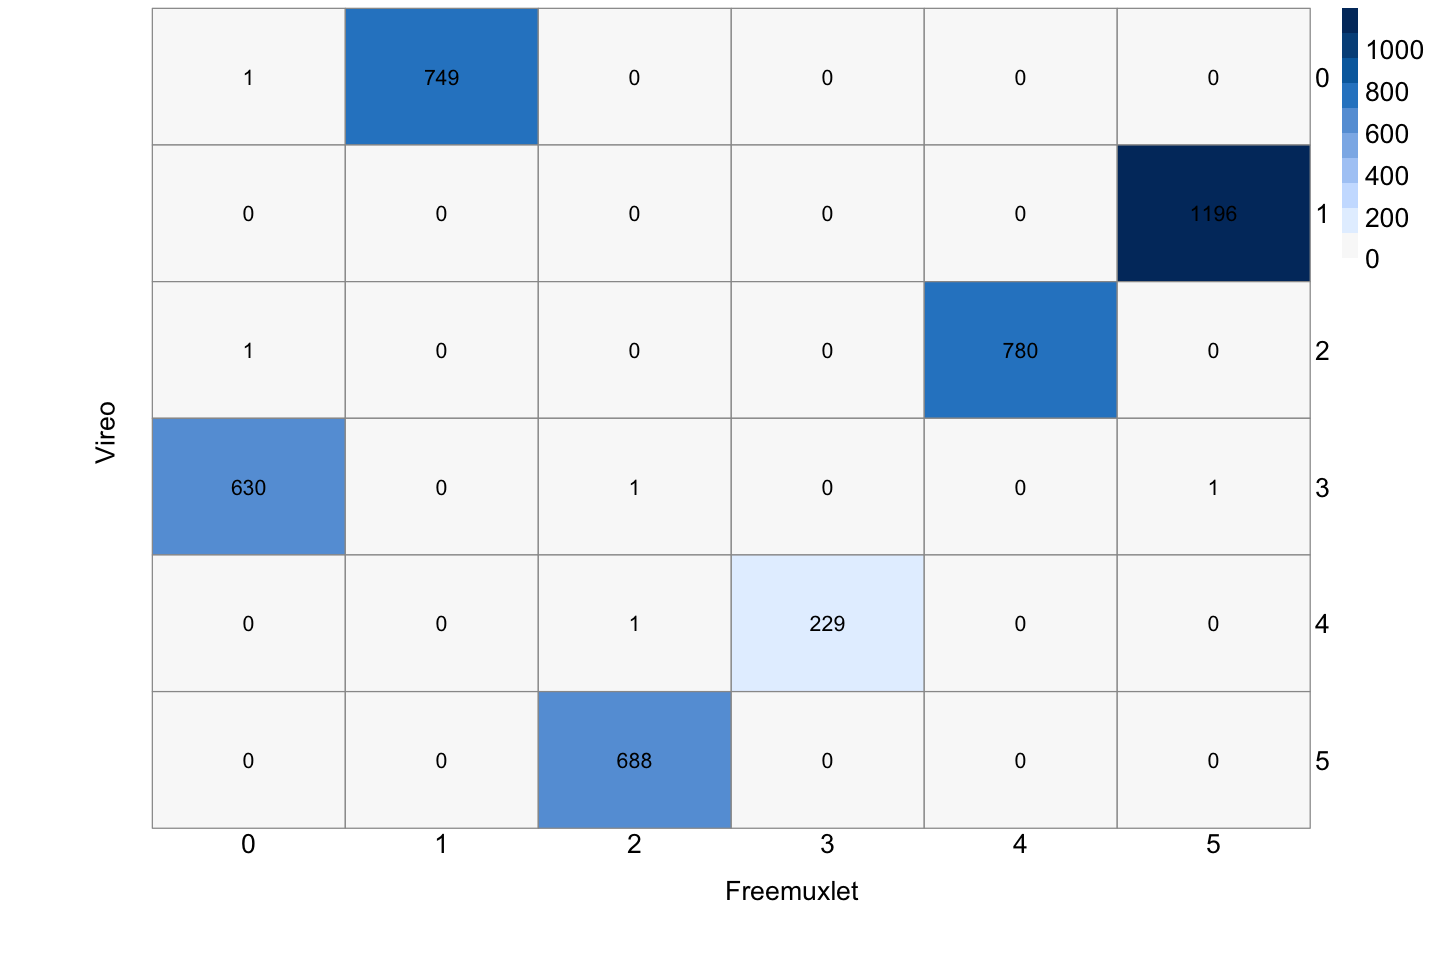

In [118]:
# Create an empyt matrix
confusion_matrix_v_fr = as.data.frame(matrix(ncol = 6, nrow = 6))
rownames(confusion_matrix_v_fr) = 0:5
colnames(confusion_matrix_v_fr) = 0:5

# Fill the matrix
for (i in c(0:5)){
  for (j in c(0:5)){
    row = nrow(gene_gx12_assign[gene_gx12_assign$vireo == i & gene_gx12_assign$freemuxlet == j,])
    confusion_matrix_v_fr[i+1,j+1] = row
  }
}

confusion_matrix_v_fr

png("S14-heatmap-fr-v-gx12.png", res=300, width=11, height=11, units="in")

# Add axis title
setHook("grid.newpage", function() 
    pushViewport(viewport(x=1,y=1,width=0.9, height=0.9, name="vp", just=c("right","top"))), action="prepend")

pheatmap(confusion_matrix_v_fr, treeheight_row=F, treeheight_col=F, display_numbers=T, angle_col="0",
         number_color = "black", fontsize = 16, cluster_rows = F, cluster_cols = F, number_format = "%.f",
         color = hcl.colors(10, "Blues 3", rev= T))

setHook("grid.newpage", NULL, "replace")
grid.text("Freemuxlet", y=-0.03, gp=gpar(fontsize=16))
grid.text("Vireo", x=-0.03, rot=90, gp=gpar(fontsize=16))
        
dev.copy()
dev.off()

,0,1,2,3,5,6
,<int>,<int>,<int>,<int>,<int>,<int>
0,9,8,1,717,8,1
1,14,7,0,26,33,968
2,15,653,3,7,64,6
3,3,16,591,1,4,7
4,18,16,0,21,106,26
5,511,3,3,2,163,2


quartz_off_screen 
                3

pdf 
  2

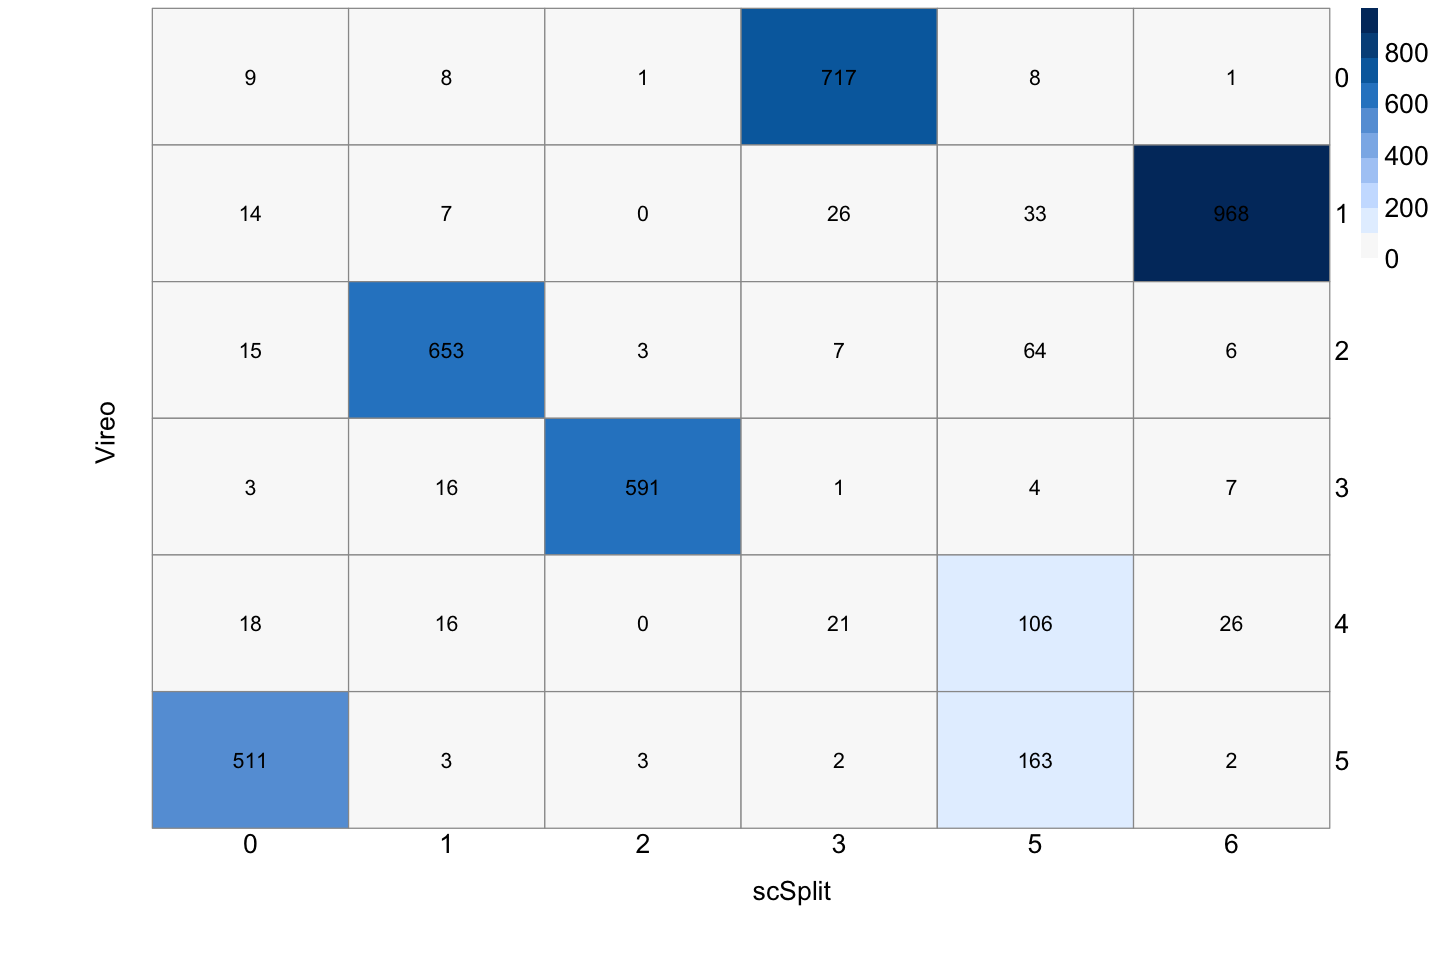

In [119]:
# Create an empyt matrix
confusion_matrix_v_sc = as.data.frame(matrix(ncol = 6, nrow = 6))
rownames(confusion_matrix_v_sc) = 0:5

# scSplit assigned doublets to cluster 4
donor_list <- c(0:3, 5:6)
colnames(confusion_matrix_v_sc) = donor_list

for (i in c(0:5)){
  for (j in c(0:5)){
    row = nrow(gene_gx12_assign[gene_gx12_assign$vireo == i & 
                                gene_gx12_assign$scsplit == donor_list[j+1],])
    confusion_matrix_v_sc[i+1,j+1] = row
  }
}

confusion_matrix_v_sc

png("S15-heatmap-v-sc-gx12.png", res=300, width=11, height=11, units="in")

# Add axis title
setHook("grid.newpage", function() 
    pushViewport(viewport(x=1,y=1,width=0.9, height=0.9, name="vp", just=c("right","top"))), action="prepend")

pheatmap(confusion_matrix_v_sc, treeheight_row=F, treeheight_col=F, display_numbers=T, angle_col="0",
         number_color = "black", fontsize = 16, cluster_rows = F, cluster_cols = F, number_format = "%.f",
         color = hcl.colors(10, "Blues 3", rev= T))

setHook("grid.newpage", NULL, "replace")
grid.text("scSplit", y=-0.03, gp=gpar(fontsize=16))
grid.text("Vireo", x=-0.03, rot=90, gp=gpar(fontsize=16))
        
dev.copy()
dev.off()

## Visualisation of concordance between genetic and hashing deconvolution methods through confusion matrix

In [120]:
# Load the genetic and hashing result for comparison
hash_gene_result <- fread("../data/pipeline_output/gx12/assignment_all_genetic_and_hash.csv")

# Remove the trial ID
colnames(hash_gene_result) <- gsub("_1", "", colnames(hash_gene_result))

# Rename the donor id of vireo 
hash_gene_result$vireo <- gsub("donor", "", hash_gene_result$vireo)

# Rename the hashtag names of hashing methods
hash_gene_result$htodemux <- gsub("-TotalSeqA", "", hash_gene_result$htodemux)
hash_gene_result$multiseq <- gsub("-TotalSeqA", "", hash_gene_result$multiseq)
hash_gene_result$demuxem <- gsub("_TotalSeqA", "", hash_gene_result$demuxem)
hash_gene_result$hashsolo <- gsub("_TotalSeqA", "", hash_gene_result$hashsolo)

# Subset by only those cells detected by RNA
hash_gene_result <- hash_gene_result[Barcode %in% white_list_gx12,]

head(hash_gene_result)

Barcode,freemuxlet,scsplit,souporcell,vireo,demuxem,hashsolo,htodemux,multiseq
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ACTTATCTCATGCCAA-1,4,doublet,5,2,Hash455,Hash453,negative,Hash455
GGGTCACAGCAGCAGT-1,2,0,2,5,Hash452,Hash453,negative,Hash452
CAGAGCCGTTGGGATG-1,5,6,4,1,negative,Hash453,negative,negative
GGTCACGTCGGTCTAA-1,2,5,2,5,Hash456,Hash453,negative,negative
GACATCACATCAGCGC-1,3,doublet,3,4,Hash455,Hash453,Hash453,Hash455
GCAACATGTACGGGAT-1,5,6,4,1,Hash453,Hash453,negative,Hash453


,Hash451,Hash452,Hash453,Hash454,Hash455,Hash456
,<int>,<int>,<int>,<int>,<int>,<int>
0,3,15,11,243,0,16
1,360,23,14,4,2,50
2,10,22,132,6,6,54
3,2,9,3,1,3,332
4,7,4,1,0,49,11
5,6,197,8,1,2,37


quartz_off_screen 
                3

pdf 
  2

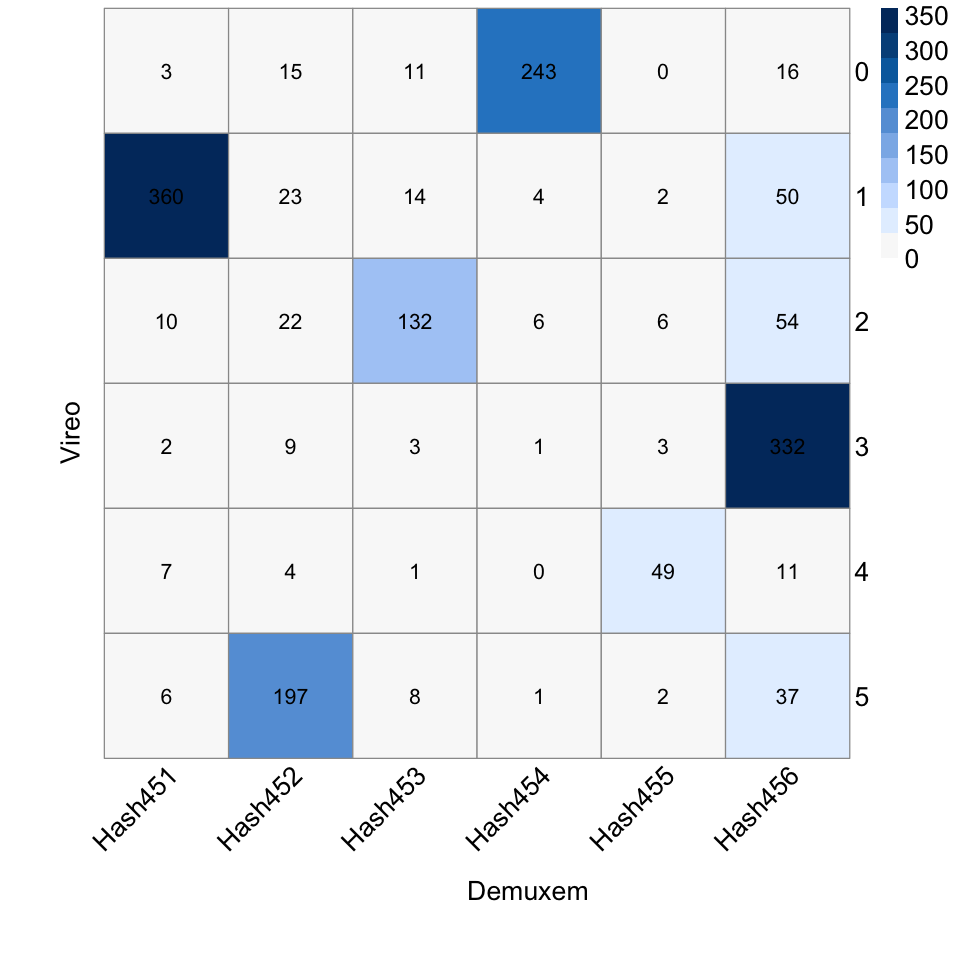

In [121]:
# Create an empyt matrix
confusion_matrix_v_demuxem = as.data.frame(matrix(ncol = 6, nrow = 6))
donor_list = paste0("Hash45",1:6)
donor_list_vireo = 0:5
rownames(confusion_matrix_v_demuxem) = donor_list_vireo
colnames(confusion_matrix_v_demuxem) = donor_list

for (i in c(0:5)){
  for (j in c(1:6)){
    row = nrow(hash_gene_result[hash_gene_result$vireo == donor_list_vireo[i+1] &
                                  hash_gene_result$demuxem == donor_list[j],])
    confusion_matrix_v_demuxem[i+1, j] = row
  }
}

confusion_matrix_v_demuxem

png("S16-heatmap-v-demuxem-gx12.png", res=300, width=11, height=11, units="in")

# Change plot size to 8 x 8
options(repr.plot.width=8, repr.plot.height=8)

# Add axis title
setHook("grid.newpage", function() 
    pushViewport(viewport(x=1,y=1,width=0.9, height=0.9, name="vp", just=c("right","top"))), action="prepend")

pheatmap(confusion_matrix_v_demuxem, treeheight_row=F, treeheight_col=F, display_numbers=T, angle_col="45",
         number_color = "black", fontsize = 16, cluster_rows = F, cluster_cols = F, number_format = "%.f",
         color = hcl.colors(10, "Blues 3", rev= T))

setHook("grid.newpage", NULL, "replace")
grid.text("Demuxem", y=-0.03, gp=gpar(fontsize=16))
grid.text("Vireo", x=-0.03, rot=90, gp=gpar(fontsize=16))
        
dev.copy()
dev.off()

,Hash451,Hash452,Hash453,Hash454,Hash455,Hash456
,<int>,<int>,<int>,<int>,<int>,<int>
0,0,6,21,282,16,1
1,281,22,75,3,28,6
2,6,22,210,3,29,8
3,3,8,36,2,18,193
4,5,5,18,0,86,2
5,3,230,26,3,20,5


quartz_off_screen 
                3

pdf 
  2

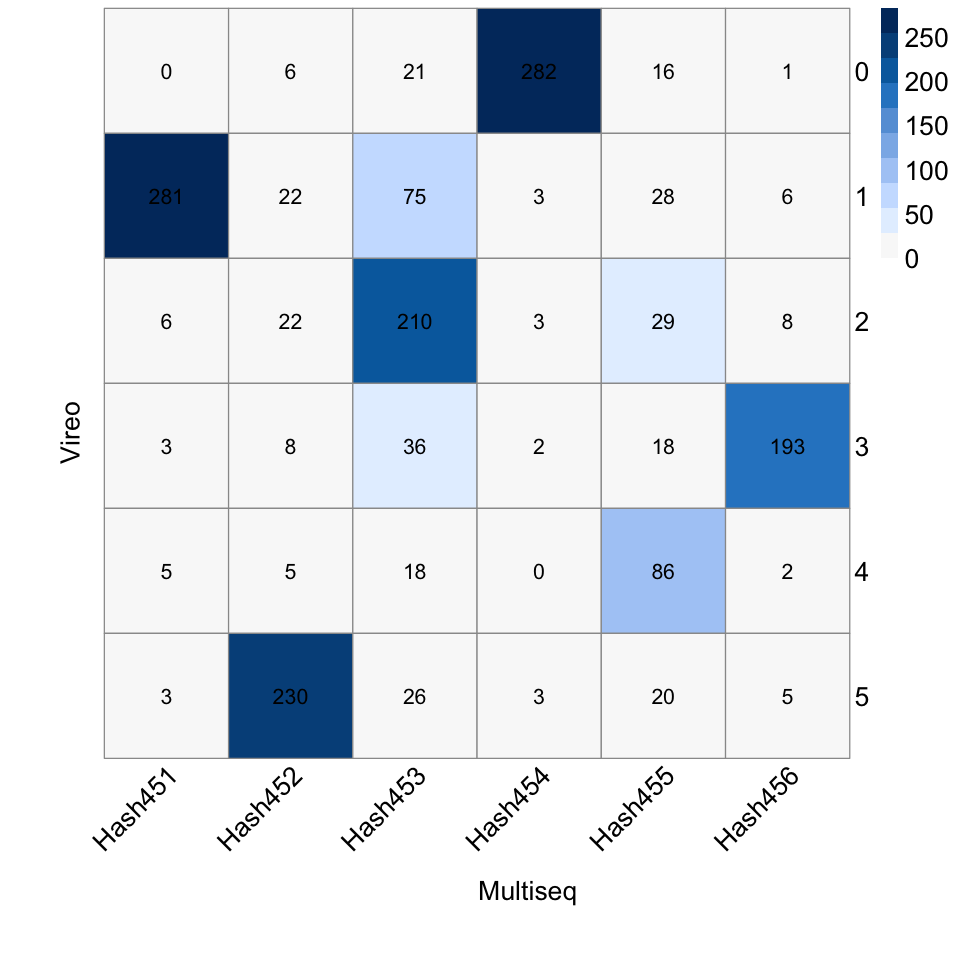

In [122]:
# Create an empyt matrix

confusion_matrix_v_multiseq = as.data.frame(matrix(ncol = 6, nrow = 6))
rownames(confusion_matrix_v_multiseq) = donor_list_vireo
colnames(confusion_matrix_v_multiseq) = donor_list

for (i in c(0:5)){
  for (j in c(1:6)){
    row = nrow(hash_gene_result[hash_gene_result$vireo == donor_list_vireo[i+1] &
                                  hash_gene_result$multiseq == donor_list[j],])
    confusion_matrix_v_multiseq[i+1, j] = row
  }
}

confusion_matrix_v_multiseq

png("S17-heatmap-v-multiseq-gx12.png", res=300, width=11, height=11, units="in")

# Add axis title
setHook("grid.newpage", function() 
    pushViewport(viewport(x=1,y=1,width=0.9, height=0.9, name="vp", just=c("right","top"))), action="prepend")

pheatmap(confusion_matrix_v_multiseq, treeheight_row=F, treeheight_col=F, display_numbers=T, angle_col="45",
         number_color = "black", fontsize = 16, cluster_rows = F, cluster_cols = F, number_format = "%.f",
         color = hcl.colors(10, "Blues 3", rev= T))

setHook("grid.newpage", NULL, "replace")
grid.text("Multiseq", y=-0.03, gp=gpar(fontsize=16))
grid.text("Vireo", x=-0.03, rot=90, gp=gpar(fontsize=16))
        
dev.copy()
dev.off()

,Hash451,Hash452,Hash453,Hash454,Hash455,Hash456
,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,496,3,0,0
1,83,0,162,0,0,0
2,1,0,124,0,0,0
3,2,0,176,0,1,6
4,0,0,63,0,0,0
5,2,6,149,0,0,0


quartz_off_screen 
                3

pdf 
  2

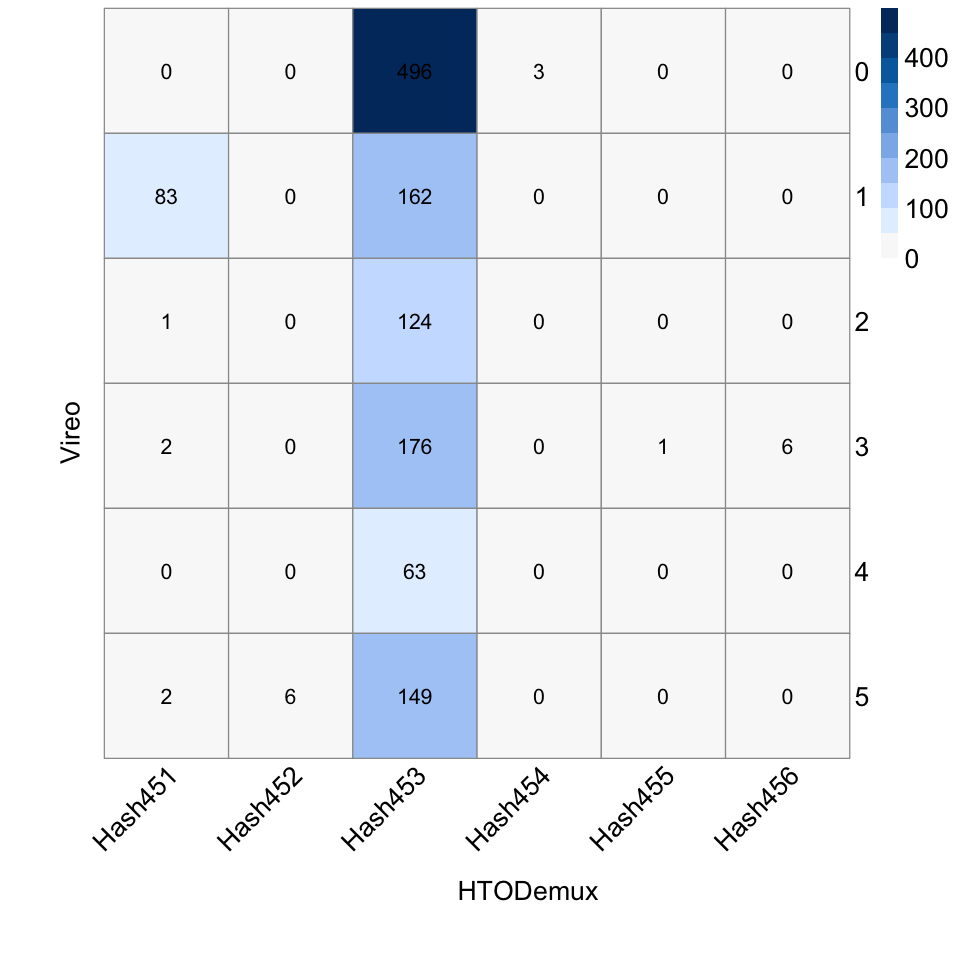

In [123]:
confusion_matrix_v_htodemux = as.data.frame(matrix(ncol = 6, nrow = 6))
rownames(confusion_matrix_v_htodemux) = donor_list_vireo
colnames(confusion_matrix_v_htodemux) = donor_list

for (i in c(0:5)){
  for (j in c(1:6)){
    row = nrow(hash_gene_result[hash_gene_result$vireo == donor_list_vireo[i+1] &
                                  hash_gene_result$htodemux == donor_list[j],])
    confusion_matrix_v_htodemux[i+1, j] = row
  }
}

confusion_matrix_v_htodemux

png("S18-heatmap-v-htodemux-gx12.png", res=300, width=11, height=11, units="in")

# Add axis title
setHook("grid.newpage", function() 
    pushViewport(viewport(x=1,y=1,width=0.9, height=0.9, name="vp", just=c("right","top"))), action="prepend")

pheatmap(confusion_matrix_v_htodemux, treeheight_row=F, treeheight_col=F, display_numbers=T, angle_col="45",
         number_color = "black", fontsize = 16, cluster_rows = F, cluster_cols = F, number_format = "%.f",
         color = hcl.colors(10, "Blues 3", rev= T))

setHook("grid.newpage", NULL, "replace")
grid.text("HTODemux", y=-0.03, gp=gpar(fontsize=16))
grid.text("Vireo", x=-0.03, rot=90, gp=gpar(fontsize=16))
        
dev.copy()
dev.off()

,Hash451,Hash452,Hash453,Hash454,Hash455,Hash456
,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,755,0,0,0
1,1,0,1090,0,0,0
2,0,0,796,0,0,0
3,0,0,625,0,0,0
4,0,0,242,0,0,0
5,0,0,692,0,0,0


quartz_off_screen 
                3

pdf 
  2

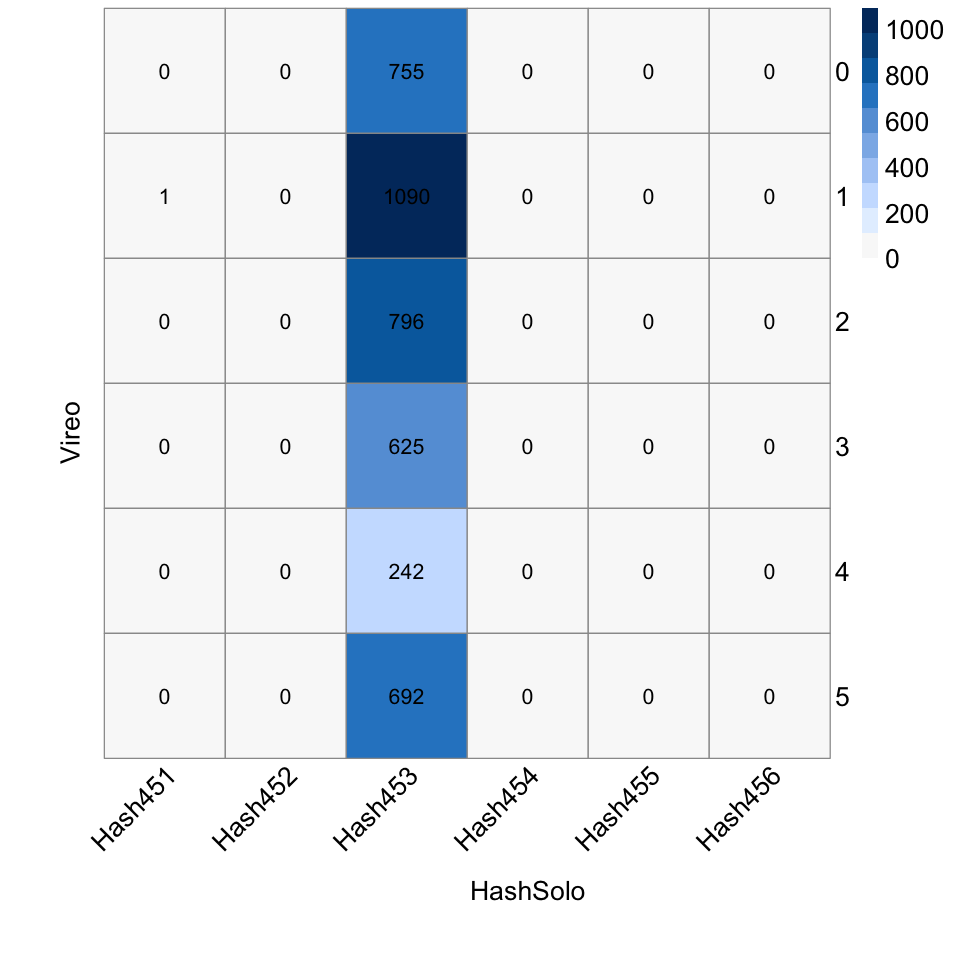

In [124]:
confusion_matrix_v_hashsolo = as.data.frame(matrix(ncol = 6, nrow = 6))
rownames(confusion_matrix_v_hashsolo) = donor_list_vireo
colnames(confusion_matrix_v_hashsolo) = donor_list

for (i in c(0:5)){
  for (j in c(1:6)){
    row = nrow(hash_gene_result[hash_gene_result$vireo == donor_list_vireo[i+1] &
                                  hash_gene_result$hashsolo == donor_list[j],])
    confusion_matrix_v_hashsolo[i+1, j] = row
  }
}

confusion_matrix_v_hashsolo

png("S19-heatmap-v-hashsolo-gx12.png", res=300, width=11, height=11, units="in")

# Add axis title
setHook("grid.newpage", function() 
    pushViewport(viewport(x=1,y=1,width=0.9, height=0.9, name="vp", just=c("right","top"))), action="prepend")

pheatmap(confusion_matrix_v_hashsolo, treeheight_row=F, treeheight_col=F, display_numbers=T, angle_col="45",
         number_color = "black", fontsize = 16, cluster_rows = F, cluster_cols = F, number_format = "%.f",
         color = hcl.colors(10, "Blues 3", rev= T))

setHook("grid.newpage", NULL, "replace")
grid.text("HashSolo", y=-0.03, gp=gpar(fontsize=16))
grid.text("Vireo", x=-0.03, rot=90, gp=gpar(fontsize=16))
        
dev.copy()
dev.off()

## Visualisation of concordance among hashing deconvolution methods through confusion matrix

,Hash451,Hash452,Hash453,Hash454,Hash455,Hash456
,<int>,<int>,<int>,<int>,<int>,<int>
Hash451,281,0,0,0,0,0
Hash452,0,201,0,0,0,0
Hash453,0,0,133,0,0,0
Hash454,0,0,0,208,0,0
Hash455,0,0,0,0,64,0
Hash456,0,0,35,0,3,200


quartz_off_screen 
                3

pdf 
  2

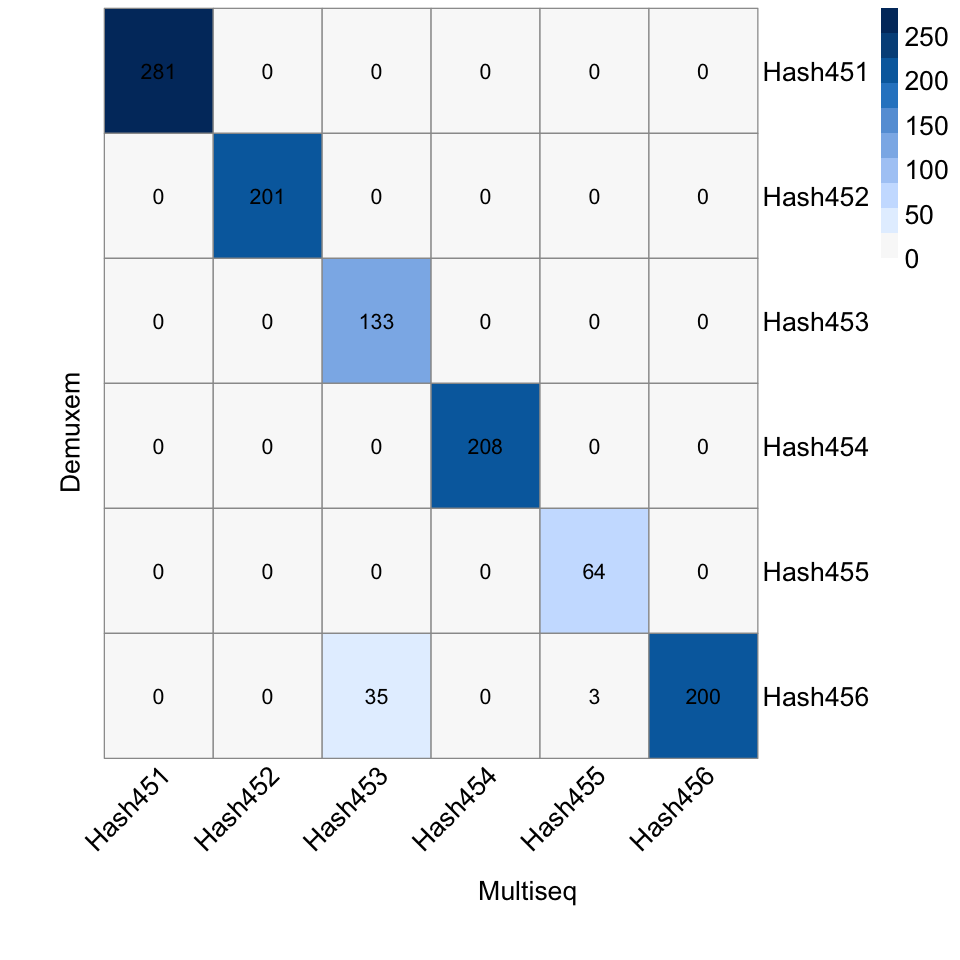

In [125]:
confusion_matrix_demuxem_multiseq = as.data.frame(matrix(ncol = 6, nrow = 6))
donor_list = paste0("Hash45",1:6)
rownames(confusion_matrix_demuxem_multiseq) = donor_list 
colnames(confusion_matrix_demuxem_multiseq) = donor_list 

for (i in c(1:6)){
  for (j in c(1:6)){
    row = nrow(hash_gene_result[hash_gene_result$demuxem == donor_list[i] & 
                             hash_gene_result$multiseq == donor_list[j],])
    confusion_matrix_demuxem_multiseq[i, j] = row
    }}

confusion_matrix_demuxem_multiseq

png("S20-heatmap-demuxem-multiseq-gx12.png", res=300, width=11, height=11, units="in")

# Add axis title
setHook("grid.newpage", function() 
    pushViewport(viewport(x=1,y=1,width=0.9, height=0.9, name="vp", just=c("right","top"))), action="prepend")

pheatmap(confusion_matrix_demuxem_multiseq, treeheight_row=F, treeheight_col=F, display_numbers=T, angle_col="45",
         number_color = "black", fontsize = 16, cluster_rows = F, cluster_cols = F, number_format = "%.f",
         color = hcl.colors(10, "Blues 3", rev= T))

setHook("grid.newpage", NULL, "replace")
grid.text("Multiseq", y=-0.03, gp=gpar(fontsize=16))
grid.text("Demuxem", x=-0.03, rot=90, gp=gpar(fontsize=16))
        
        
dev.copy()
dev.off()

,Hash451,Hash452,Hash453,Hash454,Hash455,Hash456
,<int>,<int>,<int>,<int>,<int>,<int>
Hash451,91,0,68,0,0,0
Hash452,0,6,69,0,0,0
Hash453,0,0,42,0,0,0
Hash454,0,0,259,3,0,0
Hash455,0,0,38,0,1,0
Hash456,0,0,148,0,0,5


quartz_off_screen 
                3

pdf 
  2

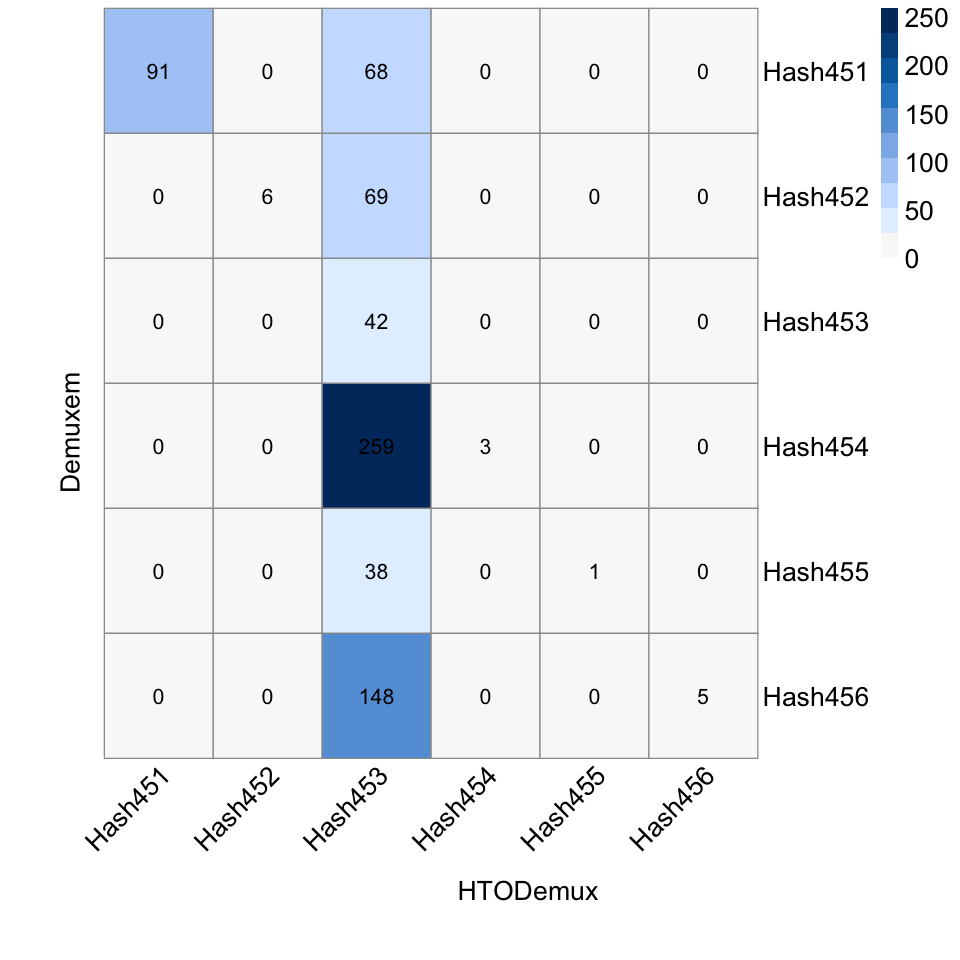

In [126]:
confusion_matrix_demuxem_htodemux = as.data.frame(matrix(ncol = 6, nrow = 6))
rownames(confusion_matrix_demuxem_htodemux) = donor_list 
colnames(confusion_matrix_demuxem_htodemux) = donor_list 

for (i in c(1:6)){
  for (j in c(1:6)){
    row = nrow(hash_gene_result[hash_gene_result$demuxem == donor_list[i] & 
                             hash_gene_result$htodemux == donor_list[j],])
    confusion_matrix_demuxem_htodemux[i, j] = row
    }}

confusion_matrix_demuxem_htodemux

png("S21-heatmap-demuxem-htodemux-gx12.png", res=300, width=11, height=11, units="in")

# Add axis title
setHook("grid.newpage", function() 
    pushViewport(viewport(x=1,y=1,width=0.9, height=0.9, name="vp", just=c("right","top"))), action="prepend")

pheatmap(confusion_matrix_demuxem_htodemux, treeheight_row=F, treeheight_col=F, display_numbers=T, angle_col="45",
         number_color = "black", fontsize = 16, cluster_rows = F, cluster_cols = F, number_format = "%.f",
         color = hcl.colors(10, "Blues 3", rev= T))

setHook("grid.newpage", NULL, "replace")
grid.text("HTODemux", y=-0.03, gp=gpar(fontsize=16))
grid.text("Demuxem", x=-0.03, rot=90, gp=gpar(fontsize=16))
        
dev.copy()
dev.off()

,Hash451,Hash452,Hash453,Hash454,Hash455,Hash456
,<int>,<int>,<int>,<int>,<int>,<int>
Hash451,1,0,306,0,0,0
Hash452,0,0,294,0,0,0
Hash453,0,0,178,0,0,0
Hash454,0,0,264,0,0,0
Hash455,0,0,65,0,0,0
Hash456,0,0,554,0,0,0


quartz_off_screen 
                3

pdf 
  2

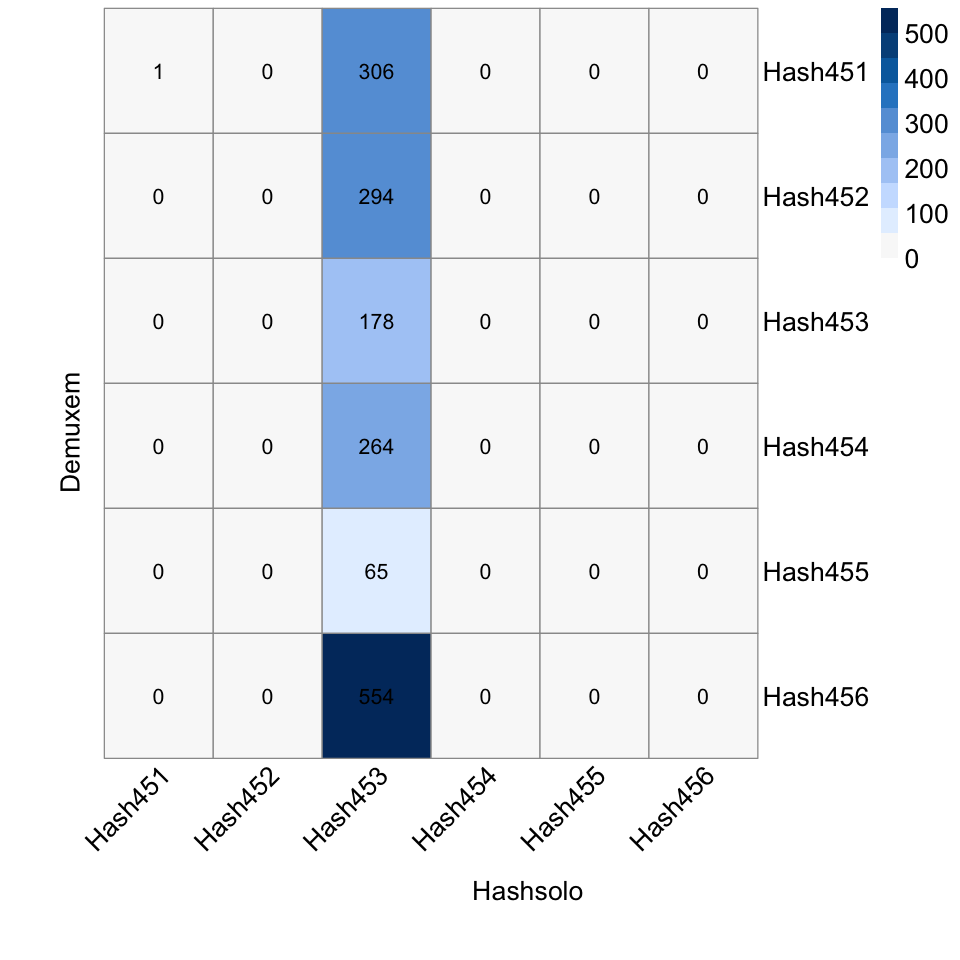

In [127]:
confusion_matrix_demuxem_hashsolo = as.data.frame(matrix(ncol = 6, nrow = 6))
rownames(confusion_matrix_demuxem_hashsolo) = donor_list 
colnames(confusion_matrix_demuxem_hashsolo) = donor_list 

for (i in c(1:6)){
  for (j in c(1:6)){
    row = nrow(hash_gene_result[hash_gene_result$demuxem == donor_list[i] & 
                             hash_gene_result$hashsolo == donor_list[j],])
    confusion_matrix_demuxem_hashsolo[i, j] = row
    }}

confusion_matrix_demuxem_hashsolo

png("S22-heatmap-demuxem-hashsolo-gx12.png", res=300, width=11, height=11, units="in")

# Add axis title
setHook("grid.newpage", function() 
    pushViewport(viewport(x=1,y=1,width=0.9, height=0.9, name="vp", just=c("right","top"))), action="prepend")

pheatmap(confusion_matrix_demuxem_hashsolo, treeheight_row=F, treeheight_col=F, display_numbers=T, angle_col="45",
         number_color = "black", fontsize = 16, cluster_rows = F, cluster_cols = F, number_format = "%.f",
         color = hcl.colors(10, "Blues 3", rev= T))

setHook("grid.newpage", NULL, "replace")
grid.text("Hashsolo", y=-0.03, gp=gpar(fontsize=16))
grid.text("Demuxem", x=-0.03, rot=90, gp=gpar(fontsize=16))

dev.copy()
dev.off()